# Problem formulation: Numeric prediction of food prices via their commonly associated factors.
### FCEC GROUP 1: Stanley Benjamin Yukon, Tharun Mathialagan, Peter Loh Jun Xin


Food is a vital commodity for growth and human survival. With the rising cost of living, we seek to examine the relationship between food and other commodity prices to investigate the degree in which they influence each other and create models to predict food prices.

It is a commonly held belief that the price of food can be impacted by many other things, such as the Price of Crude Oil, Natural Gas, Fertilizer and Inflation. 

We seek to determine if these relationships do in fact exist and whether we can create a machine learning model to predict food prices

In [1]:
import datetime as dt
import pandas as pd

from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override()

Downloading new Modules, datetime and yfinance.
Downloading pandas_datareader

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sb.set()

Downloading usual Modules, numpy, pandas, seaborn etc.

There are no SINGULAR, GLOBAL prices for food or many other commodities. We will now need to get proxies for the price of real world items.

1. Crude oil can be tracked via Crude Oil prices [CL=F]
2. Natural Gas can be tracked via Natural Gas prices [NG=F]

3. Inflation Rates. There is no singular GLOBAL inflation rate but it can be approximated using the trade price of Gold [GC=F]. If inflation is high, gold prices are likely to increase as well; due to people seeking to use Gold as a hedge.

4. Bond Prices can be approximated using the US 5-Year Treasury Bond [ZF=F]
5. RANDOM VARIABLE ( Berkshire Hathaway ) [BRK-A]
6. RANDOM VARIABLE ( Tesla ) [TSLA]
7. Part one of approximating "Food Prices" - Rough Rice Futures [ZR=F]
8. Part two of approximating "Food Prices" - Wheat Futures [ZE=F]

9. Fertilizer Prices. There is no singular GLOBAL fertilizer price but it can be approximated using the trade price of fertilizer manufacturing companies. We chose [SQM] based in Chile. If the price of fertilizer goes up, companies manufacturing it are likely to experience an increase in their stock price. The reverse could be said of if fertilizer prices were to go down. It had a quite a large spike in its trade price at the onset of the Ukraine war, an event which caused the price of fertilizer to spike.



In [3]:
enddate = dt.datetime(2023,1,1) #Set end date variable
startdate = dt.datetime(2013,1,1) #Set start date variable
stocks = ['CL=F','NG=F','GC=F','ZF=F','BRK-A','TSLA','ZR=F','SQM','KE=F']
# List of Stocks: CRUDE OIL , NATURAL GAS, GOLD, GOV. BONDS, BERKSHIRE HATHAWAY, 
#                 TESLA, ROUGH RICE, FERTILIZER, WHEAT

pdr.get_data_yahoo(stocks, start=startdate, end=enddate)

[*********************100%%**********************]  9 of 9 completed


Price      Adj Close                                                    \
Ticker         BRK-A       CL=F         GC=F    KE=F   NG=F        SQM   
Date                                                                     
2013-01-02  139610.0  93.120003  1687.900024  811.00  3.233  33.891113   
2013-01-03  140549.0  92.919998  1673.699951  811.25  3.198  33.653553   
2013-01-04  140803.0  93.089996  1648.099976  804.50  3.287  33.624577   
2013-01-07  140190.0  93.190002  1645.500000  807.50  3.266  33.381214   
2013-01-08  141000.0  93.150002  1661.500000  808.75  3.218  33.410194   
...              ...        ...          ...     ...    ...        ...   
2022-12-23  463400.0  79.559998  1795.900024  874.75  5.079  75.882904   
2022-12-27  461955.0  79.529999  1814.800049  879.25  5.282  71.837044   
2022-12-28  459800.0  78.959999  1807.900024  882.25  4.709  70.811729   
2022-12-29  468725.0  78.400002  1819.500000  866.50  4.559  72.862358   
2022-12-30  468711.0  80.260002  1819.699951  888.00  4.475  73.749130   

Price                                          Close  ...    Open  Volume  \
Ticker            TSLA        ZF=F    ZR=F     BRK-A  ...    ZR=F   BRK-A   
Date                                                  ...                   
2013-01-02    2.357333  124.187500  1475.5  139610.0  ...  1480.0   83200   
2013-01-03    2.318000  123.945312  1478.0  140549.0  ...  1475.0  100200   
2013-01-04    2.293333  123.890625  1503.0  140803.0  ...  1497.0   34700   
2013-01-07    2.289333  123.906250  1497.5  140190.0  ...  1497.5   60400   
2013-01-08    2.245333  124.031250  1496.0  141000.0  ...  1496.0   61700   
...                ...         ...     ...       ...  ...     ...     ...   
2022-12-23  123.150002  108.375000  1801.5  463400.0  ...  1795.0    2800   
2022-12-27  109.099998  107.968750  1793.5  461955.0  ...  1800.0    4500   
2022-12-28  112.709999  108.070312  1773.0  459800.0  ...  1761.0    3000   
2022-12-29  121.820000  108.140625  1789.5  468725.0  ...  1764.0    3000   
2022-12-30  123.180000  108.046875  1805.0  468711.0  ...  1796.0    3400   

Price                                                                         \
Ticker          CL=F   GC=F     KE=F      NG=F      SQM       TSLA      ZF=F   
Date                                                                           
2013-01-02  203865.0   35.0   8000.0  137084.0   515143   17922000  474143.0   
2013-01-03  189812.0  140.0  10112.0   91042.0   579639   11130000  674720.0   
2013-01-04  210747.0  199.0   8628.0  108560.0   657075   10110000  721395.0   
2013-01-07  166292.0   49.0  16856.0   79341.0   633967    6630000  360774.0   
2013-01-08  195867.0   17.0  16317.0  105512.0   553245   19260000  427773.0   
...              ...    ...      ...       ...      ...        ...       ...   
2022-12-23  237711.0   49.0   8333.0   42105.0   859700  166989700      11.0   
2022-12-27  199601.0   69.0   9250.0   41154.0  2270300  208643400      32.0   
2022-12-28  207717.0  434.0  10452.0  115022.0  2180400  221070500     314.0   
2022-12-29  199858.0  277.0   9803.0   78441.0  1702300  221923300      33.0   
2022-12-30  205909.0   95.0  13233.0   62281.0   843700  157777300  813390.0   

Price              
Ticker       ZR=F  
Date               
2013-01-02   16.0  
2013-01-03   17.0  
2013-01-04    5.0  
2013-01-07    4.0  
2013-01-08    4.0  
...           ...  
2022-12-23  514.0  
2022-12-27  331.0  
2022-12-28  370.0  
2022-12-29  135.0  
2022-12-30   19.0  

[2518 rows x 54 columns]

In [4]:
stockdata = pdr.get_data_yahoo(stocks, start=startdate, end=enddate)

[*********************100%%**********************]  9 of 9 completed


In [5]:
stockdata['Adj Close'].to_csv('stockdata.csv', header = True) #Converting the Stock Data to CSV format.

# Exploratory Data Analysis

In [6]:
stockCSV = pd.read_csv('stockdata.csv')
stockCSV.head()

,Date,BRK-A,CL=F,GC=F,KE=F,NG=F,SQM,TSLA,ZF=F,ZR=F
0,2013-01-02,139610.0,93.120003,1687.900024,811.00,3.233,33.891113,2.357333,124.187500,1475.5
1,2013-01-03,140549.0,92.919998,1673.699951,811.25,3.198,33.653553,2.318000,123.945312,1478.0
2,2013-01-04,140803.0,93.089996,1648.099976,804.50,3.287,33.624577,2.293333,123.890625,1503.0
3,2013-01-07,140190.0,93.190002,1645.500000,807.50,3.266,33.381214,2.289333,123.906250,1497.5
4,2013-01-08,141000.0,93.150002,1661.500000,808.75,3.218,33.410194,2.245333,124.031250,1496.0


In [7]:
print("Data type : ", type(stockCSV))
print("Data dims : ", stockCSV.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2518, 10)


In [8]:
import pandas as pd

stockCSV['Foodsum'] = stockCSV['KE=F']+stockCSV['ZR=F']
stockCSV.head()

,Date,BRK-A,CL=F,GC=F,KE=F,NG=F,SQM,TSLA,ZF=F,ZR=F,Foodsum
0,2013-01-02,139610.0,93.120003,1687.900024,811.00,3.233,33.891113,2.357333,124.187500,1475.5,2286.50
1,2013-01-03,140549.0,92.919998,1673.699951,811.25,3.198,33.653553,2.318000,123.945312,1478.0,2289.25
2,2013-01-04,140803.0,93.089996,1648.099976,804.50,3.287,33.624577,2.293333,123.890625,1503.0,2307.50
3,2013-01-07,140190.0,93.190002,1645.500000,807.50,3.266,33.381214,2.289333,123.906250,1497.5,2305.00
4,2013-01-08,141000.0,93.150002,1661.500000,808.75,3.218,33.410194,2.245333,124.031250,1496.0,2304.75


Combining rough rice and wheat futures into a single data frame called Foodsum

In [9]:
stockCSV = stockCSV.dropna(how='any') #Cleaning Null Values
stockCSV.head()

,Date,BRK-A,CL=F,GC=F,KE=F,NG=F,SQM,TSLA,ZF=F,ZR=F,Foodsum
0,2013-01-02,139610.0,93.120003,1687.900024,811.00,3.233,33.891113,2.357333,124.187500,1475.5,2286.50
1,2013-01-03,140549.0,92.919998,1673.699951,811.25,3.198,33.653553,2.318000,123.945312,1478.0,2289.25
2,2013-01-04,140803.0,93.089996,1648.099976,804.50,3.287,33.624577,2.293333,123.890625,1503.0,2307.50
3,2013-01-07,140190.0,93.190002,1645.500000,807.50,3.266,33.381214,2.289333,123.906250,1497.5,2305.00
4,2013-01-08,141000.0,93.150002,1661.500000,808.75,3.218,33.410194,2.245333,124.031250,1496.0,2304.75


In [10]:
print("Data type : ", type(stockCSV)) # Checking that NULL values were indeed
print("Data dims : ", stockCSV.shape) # removed

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2503, 11)


Rounding off values of stock prices to 3 decimal places: 

In [11]:
stockCSV['Foodsum'] = stockCSV['Foodsum'].round(3)
stockCSV['CL=F'] = stockCSV['CL=F'].round(3)
stockCSV['NG=F'] = stockCSV['NG=F'].round(3)
stockCSV['SQM'] = stockCSV['SQM'].round(3)

stockCSV['GC=F'] = stockCSV['GC=F'].round(3)
stockCSV['ZF=F'] = stockCSV['ZF=F'].round(3)
stockCSV['BRK-A'] = stockCSV['BRK-A'].round(3)
stockCSV['TSLA'] = stockCSV['TSLA'].round(3)

In [12]:
stockCSV.head()

,Date,BRK-A,CL=F,GC=F,KE=F,NG=F,SQM,TSLA,ZF=F,ZR=F,Foodsum
0,2013-01-02,139610.0,93.12,1687.9,811.00,3.233,33.891,2.357,124.188,1475.5,2286.50
1,2013-01-03,140549.0,92.92,1673.7,811.25,3.198,33.654,2.318,123.945,1478.0,2289.25
2,2013-01-04,140803.0,93.09,1648.1,804.50,3.287,33.625,2.293,123.891,1503.0,2307.50
3,2013-01-07,140190.0,93.19,1645.5,807.50,3.266,33.381,2.289,123.906,1497.5,2305.00
4,2013-01-08,141000.0,93.15,1661.5,808.75,3.218,33.410,2.245,124.031,1496.0,2304.75


In [13]:
Wheat = pd.DataFrame(stockCSV['KE=F'])
Rice = pd.DataFrame(stockCSV['ZR=F'])
Food = pd.DataFrame(stockCSV['Foodsum'])

Crude = pd.DataFrame(stockCSV['CL=F'])
Nat = pd.DataFrame(stockCSV['NG=F'])

Fert = pd.DataFrame(stockCSV['SQM'])

Gold = pd.DataFrame(stockCSV['GC=F'])
Bonds = pd.DataFrame(stockCSV['ZF=F'])

Berkshire = pd.DataFrame(stockCSV['BRK-A'])
Tesla = pd.DataFrame(stockCSV['TSLA'])

Date = pd.DataFrame(stockCSV['Date'])

## Displaying the count, mean, standard deviation, min, 25th, 50th, 75th percentiles and maximum values of variables

In [14]:
Food.describe()

,Foodsum
count,2503.000000
mean,1869.729724
std,376.943992
min,1290.750000
25%,1580.250000
50%,1757.500000
75%,2187.375000
max,3134.500000


In [15]:
Fert.describe()

,SQM
count,2503.000000
mean,30.406471
std,18.625624
min,8.293000
25%,17.232000
50%,24.539000
75%,38.609000
max,99.507000


### Visualizing the count, mean, standard deviation, min, 25th, 50th, 75th percentiles and maximum values of variables Foodsum and Fertilizer

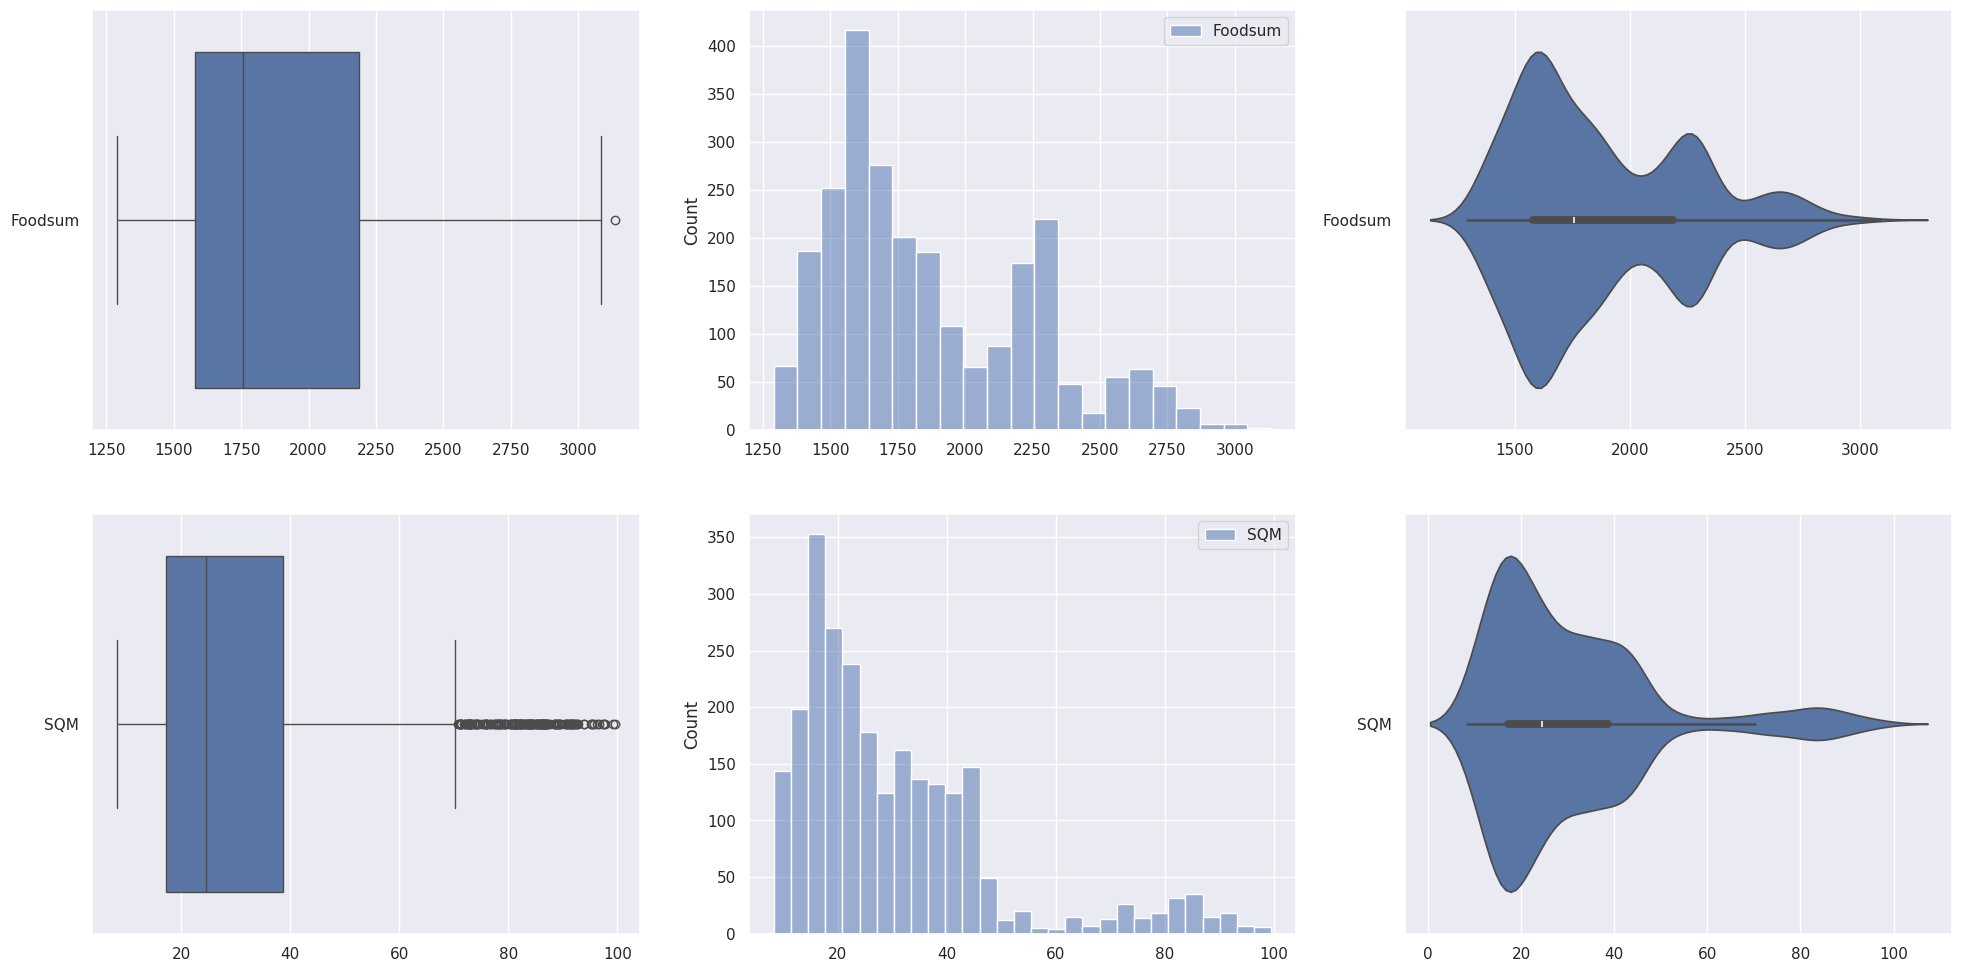

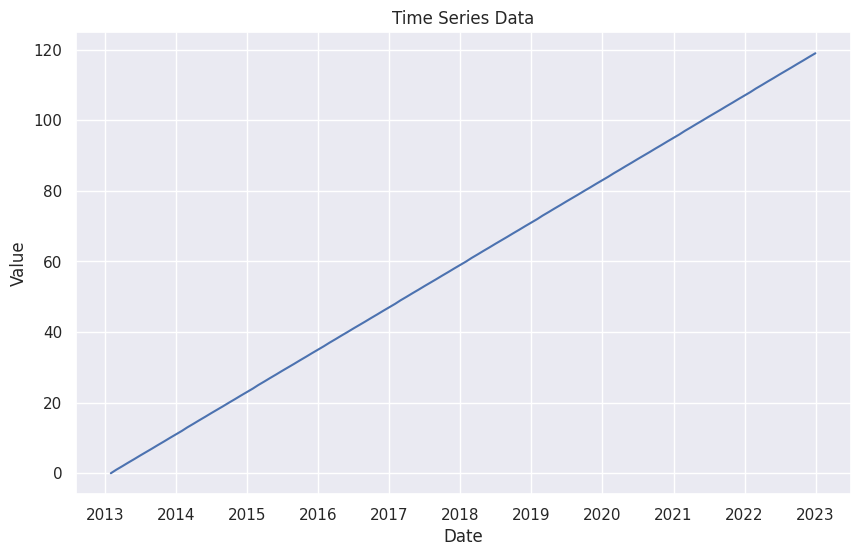

In [16]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sb.boxplot(data = Food, orient = "h", ax = axes[0,0])
sb.histplot(data = Food, ax = axes[0,1])
sb.violinplot(data = Food, orient = "h", ax = axes[0,2])

sb.boxplot(data = Fert, orient = "h", ax = axes[1,0])
sb.histplot(data = Fert, ax = axes[1,1])
sb.violinplot(data = Fert, orient = "h", ax = axes[1,2])

import matplotlib.pyplot as plt
import pandas as pd

# Sample time series data (you can replace this with your own data)
dates = pd.date_range('2013-01-01', '2023-01-01', freq='M')
data = pd.Series(range(len(dates)), index=dates)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(data)
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

SQM has a few outliers of values above 1.5x of the 75th percentile. These higher values are likely a result of the Russian Invasion of Ukraine in 2022, which sent the price of Fertilizer soaring and the price of shares in the company above 80USD for the first time in all its trading history.


In [17]:
Crude.describe()

,CL=F
count,2503.000000
mean,65.807575
std,22.657453
min,-37.630000
25%,48.515000
50%,59.680000
75%,86.495000
max,123.700000


While it may be surprising that the minimum price of crude oil is negative (-37.63USD), it is not an abnormaly as Oil prices have indeed went negative before.

https://www.cnbc.com/2020/06/16/how-negative-oil-prices-revealed-the-dangers-of-futures-trading.html

In [18]:
Nat.describe()

,NG=F
count,2503.000000
mean,3.420989
std,1.400302
min,1.482000
25%,2.625500
50%,2.959000
75%,3.896500
max,9.680000


<Axes: >

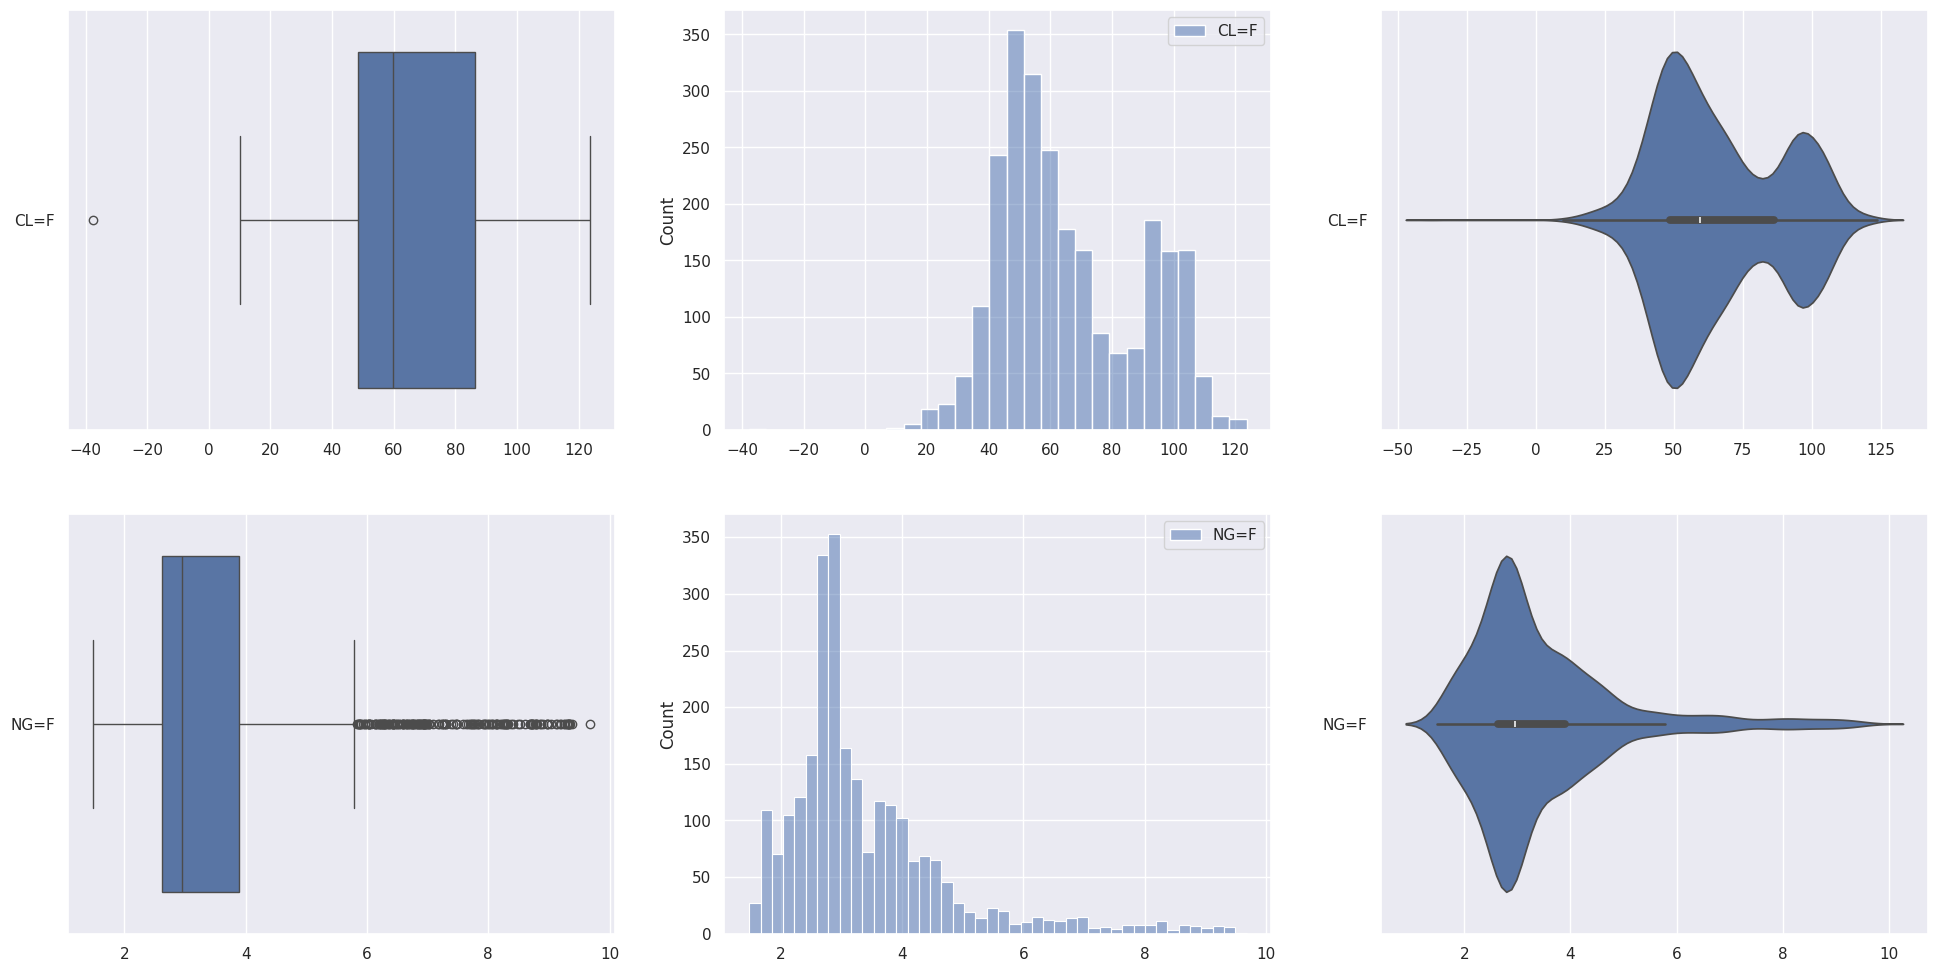

In [19]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sb.boxplot(data = Crude, orient = "h", ax = axes[0,0])
sb.histplot(data = Crude, ax = axes[0,1])
sb.violinplot(data = Crude, orient = "h", ax = axes[0,2])

sb.boxplot(data = Nat, orient = "h", ax = axes[1,0])
sb.histplot(data = Nat, ax = axes[1,1])
sb.violinplot(data = Nat, orient = "h", ax = axes[1,2])

Natural Gas [NG=F] has MANY OUTLIERs. It could be argued that these Outliers SHOULD BE removed but we believe the Volatile Nature of Natural Gas Prices are BEST represented by leaving the outliers within the dataset.

In [20]:
Gold.describe()

,GC=F
count,2503.000000
mean,1438.280463
std,256.634953
min,1050.800000
25%,1242.600000
50%,1318.100000
75%,1708.600000
max,2051.500000


In [21]:
Bonds.describe()

,ZF=F
count,2503.000000
mean,119.220623
std,4.228890
min,105.664000
25%,117.492000
50%,119.633000
75%,121.574000
max,126.211000


<Axes: >

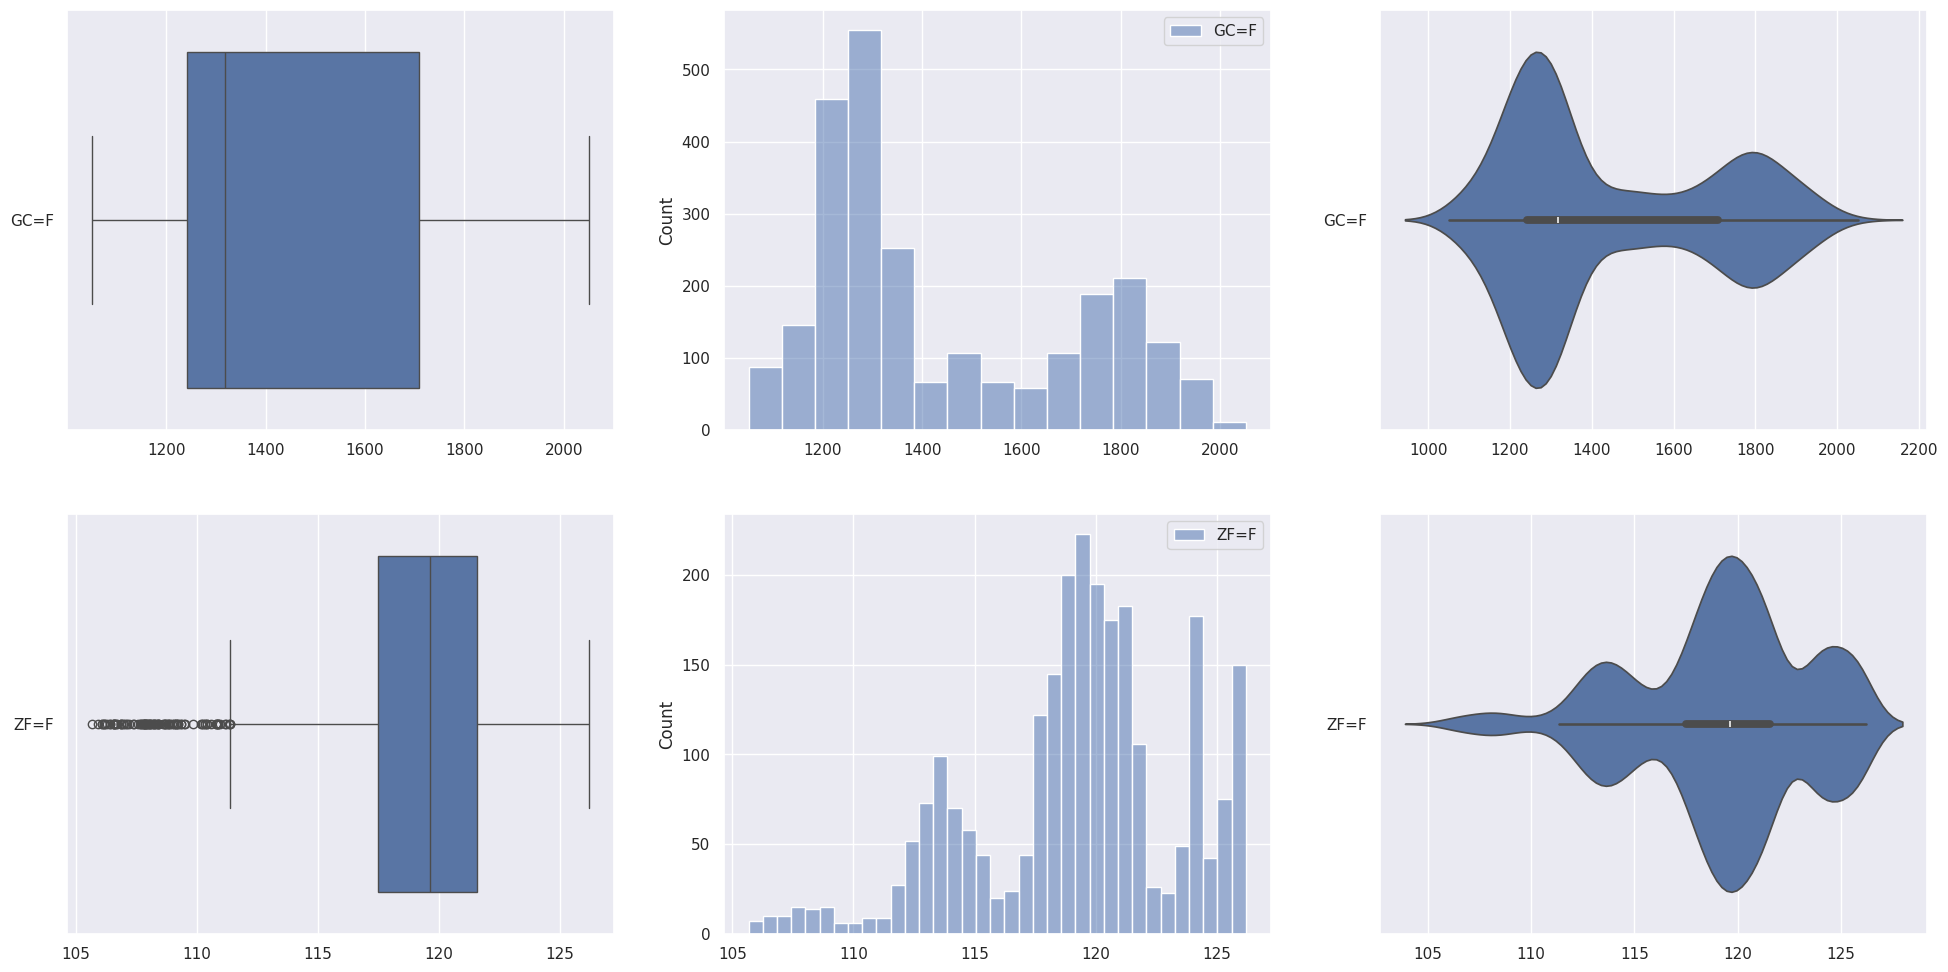

In [22]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sb.boxplot(data = Gold, orient = "h", ax = axes[0,0])
sb.histplot(data = Gold, ax = axes[0,1])
sb.violinplot(data = Gold, orient = "h", ax = axes[0,2])

sb.boxplot(data = Bonds, orient = "h", ax = axes[1,0])
sb.histplot(data = Bonds, ax = axes[1,1])
sb.violinplot(data = Bonds, orient = "h", ax = axes[1,2])

As with Natural Gas, Bond prices do fluctuate wildly and removing Outliers for the sake of improving data consistency would negate the very idea of fairness in comparing which variable has the best correlation with food prices. 

In [23]:
Berkshire.describe()

,BRK-A
count,2503.000000
mean,284409.869756
std,92199.786970
min,139610.000000
25%,210677.500000
50%,275000.000000
75%,328325.500000
max,539180.000000


In [24]:
Tesla.describe()

,TSLA
count,2503.000000
mean,73.456414
std,102.171036
min,2.194000
25%,14.574500
50%,19.032000
75%,92.141500
max,409.970000


<Axes: >

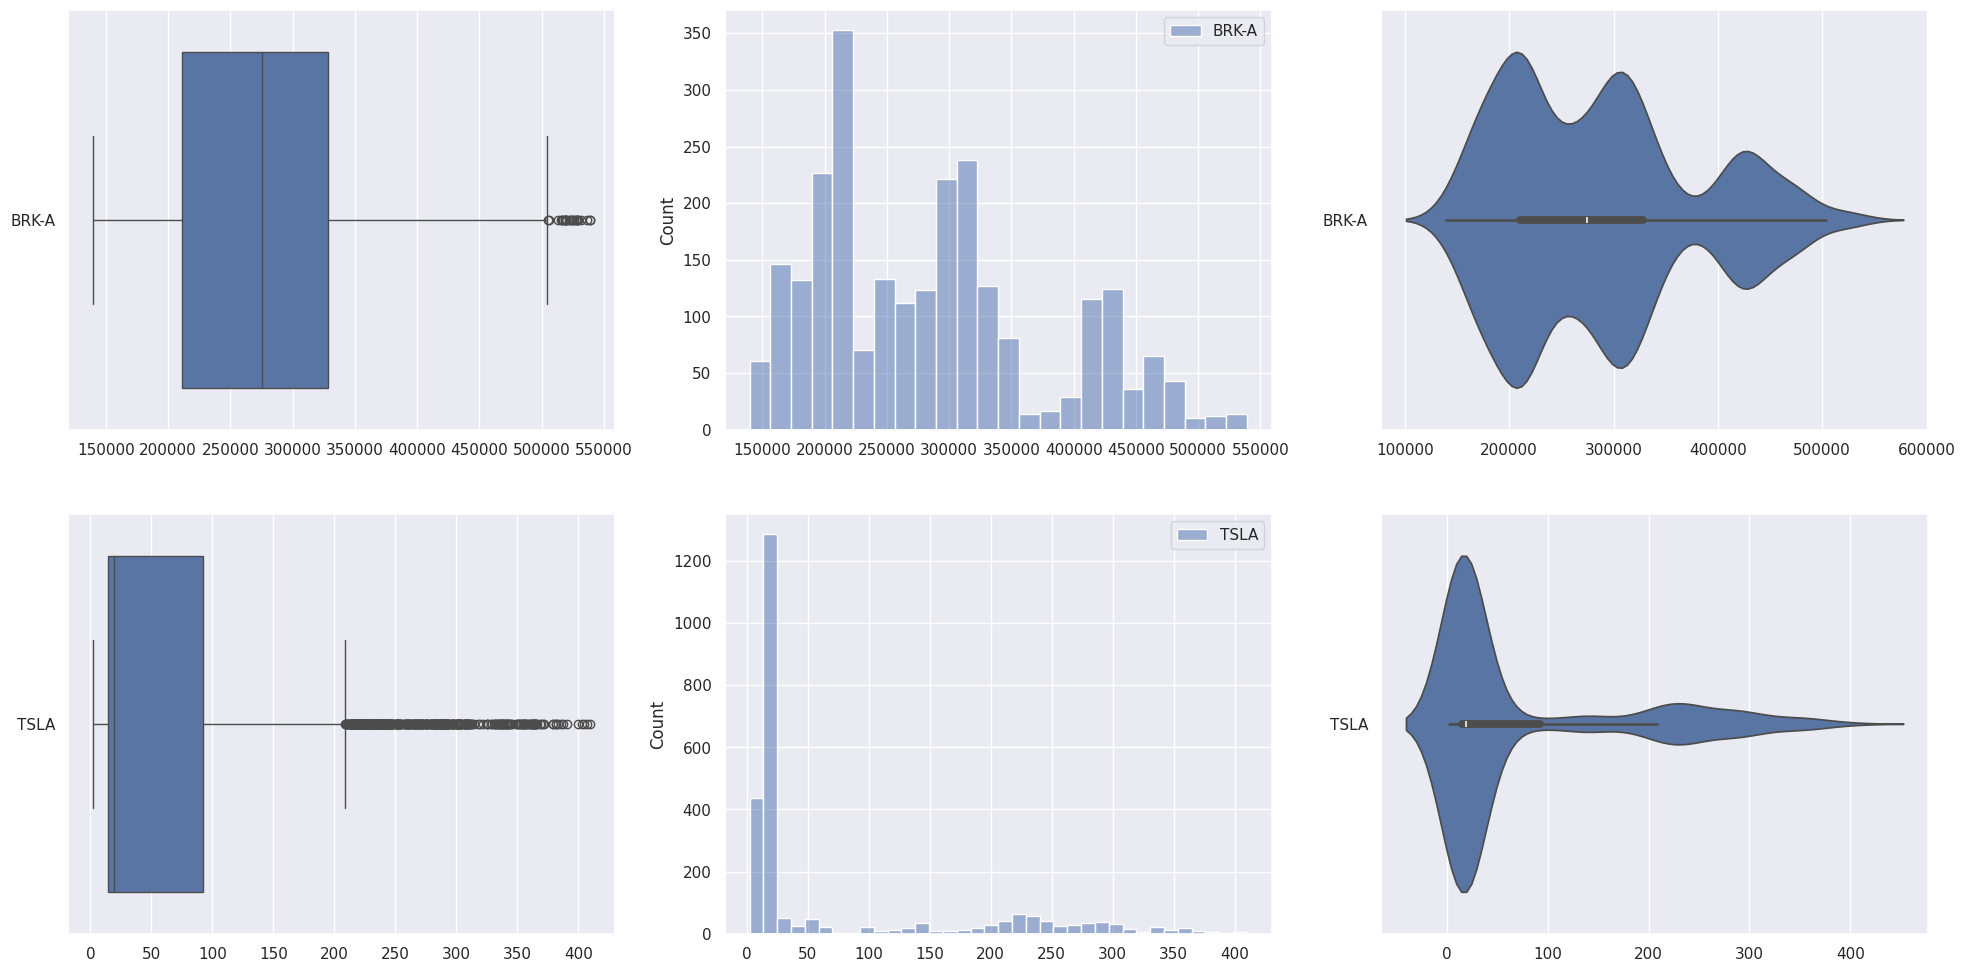

In [25]:
f, axes = plt.subplots(2, 3, figsize=(24, 12))

sb.boxplot(data = Berkshire, orient = "h", ax = axes[0,0])
sb.histplot(data = Berkshire, ax = axes[0,1])
sb.violinplot(data = Berkshire, orient = "h", ax = axes[0,2])

sb.boxplot(data = Tesla , orient = "h", ax = axes[1,0])
sb.histplot(data = Tesla , ax = axes[1,1])
sb.violinplot(data = Tesla , orient = "h", ax = axes[1,2])

TSLA spent the Majority of its time on the stock market trading below 55.67 before 1st May 2020. From 1st AUG 2019 to 1st AUG 2020 it skyrocketed from 15.04 to 166.11. From 2020 onwards, it has consistently stayed above 166.11. It thus has a large amount of Outliers. Removing these Outliers would compromise the integirty of the data and the story it tells.

# Machine Learning via Linear Regression

Initially, we used linear regression to predict the prices of food because our data is numeric in nature.
However, because the values are from a time series dataset, we realise that linear regression by itself would be an inaccurate model
The values in times series data are correlated with themselves and as such, a different model would be a better predictor

In [26]:
def LinRegression (predictor,response, testSize = 0.2,SolidLine = False):

    x_train, x_test, y_train, y_test = train_test_split(predictor,response, test_size = testSize)


    #print("********** Dataset : {0} vs {1} **********".format(predictor,response))
    #printout the number of data entries in each datasets
    print("Train set:", x_train.shape, y_train.shape)
    print("Test set:", x_test.shape, y_test.shape)
    print()
    # Linear Regression using Train Data
    linreg = LinearRegression() # Create a Linear Regression object
    linreg.fit(x_train,y_train) # Train the Linear Regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression:\t: b = ', linreg.intercept_)
    print('Coefficients of Regression:\t: a = ', linreg.coef_)
    print()

    # Predict Saleprice values corresponding to GrLivArea
    y_train_pred = linreg.predict(x_train)
    y_test_pred = linreg.predict(x_test)
     
    f = plt.figure(figsize=(24,10))
    plt.scatter(x_train,y_train)
    plt.scatter(x_train,y_train_pred)

    
        
    mse = mean_squared_error(y_test, y_test_pred)
    print("Train Set - Explained Variance (R^2)\t:", linreg.score(x_train,y_train))
    print()
    print("Test Set Metrics")
    MSE = mse(y_test, y_test_pred)
    print("Mean Squared Error (MSE) \t:", MSE)
    RMSE = np.sqrt(MSE)
    print("Root Mean Squared Error (RMSE) \t:", RMSE)
    print()
    print()

Debug linear reg

In [27]:
def LinRegression (predictor,response, testSize = 0.2,SolidLine = False):

    x_train, x_test, y_train, y_test = train_test_split(predictor,response, test_size = testSize)


    #print("********** Dataset : {0} vs {1} **********".format(predictor,response))
    #printout the number of data entries in each datasets
    print("Train set:", x_train.shape, y_train.shape)
    print("Test set:", x_test.shape, y_test.shape)
    print()
    # Linear Regression using Train Data
    linreg = LinearRegression() # Create a Linear Regression object
    linreg.fit(x_train,y_train) # Train the Linear Regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression:\t: b = ', linreg.intercept_)
    print('Coefficients of Regression:\t: a = ', linreg.coef_)
    print()

    # Predict Saleprice values corresponding to GrLivArea
    y_train_pred = linreg.predict(x_train)
    y_test_pred = linreg.predict(x_test)
     
    f = plt.figure(figsize=(24,10))
    plt.scatter(x_train,y_train)
    plt.scatter(x_train,y_train_pred)

    
        
    #mse = mean_squared_error(y_test, y_test_pred)
    mse = np.mean(np.square(np.array(y_test) - np.array(y_test_pred)))
    print("Train Set - Explained Variance (R^2)\t:", linreg.score(x_train,y_train))
    print()
    print("Test Set Metrics")
    MSE = np.mean(np.square(np.array(y_test) - np.array(y_test_pred)))
    print("Mean Squared Error (MSE) \t:", MSE)
    RMSE = np.sqrt(MSE)
    print("Root Mean Squared Error (RMSE) \t:", RMSE)
    print()
    print()

Desribe function (          here            )

Train set: (2002, 1) (2002, 1)
Test set: (501, 1) (501, 1)

Intercept of Regression:	: b =  [694.92900825]
Coefficients of Regression:	: a =  [[0.81797217]]

Train Set - Explained Variance (R^2)	: 0.3027395050714278

Test Set Metrics
Mean Squared Error (MSE) 	: 88464.92575088976
Root Mean Squared Error (RMSE) 	: 297.4305393716149




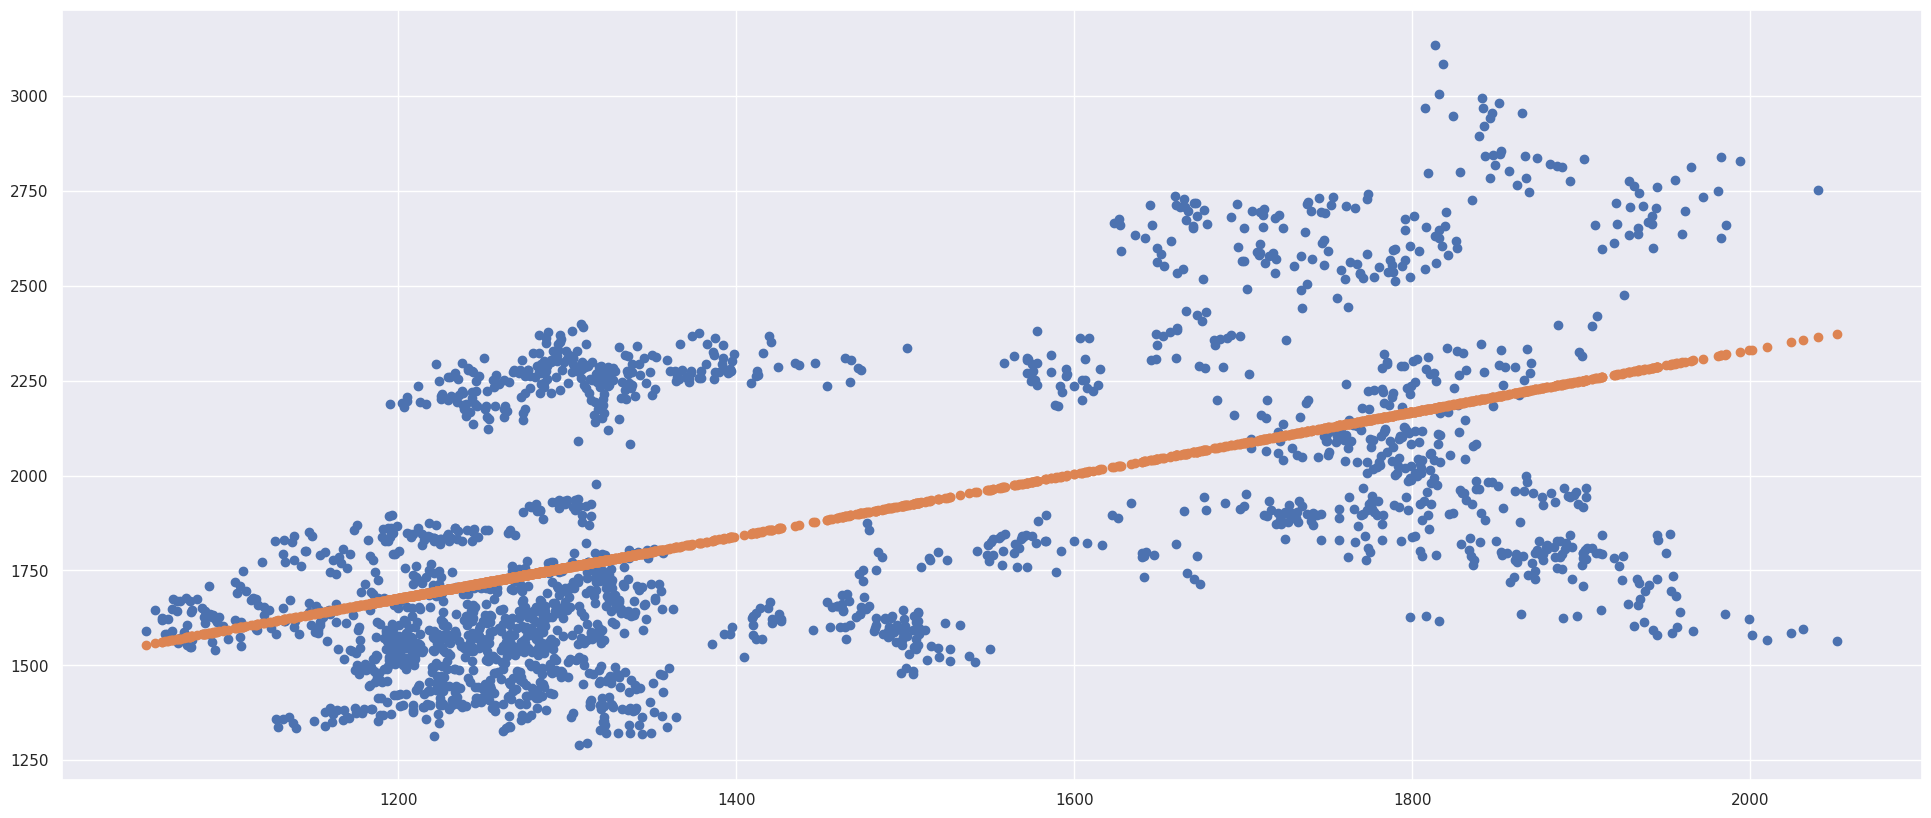

In [28]:
LinRegression(Gold, Food)

Train set: (2002, 1) (2002, 1)
Test set: (501, 1) (501, 1)

Intercept of Regression:	: b =  [2970.45945997]
Coefficients of Regression:	: a =  [[-9.24615742]]

Train Set - Explained Variance (R^2)	: 0.010943035372651289

Test Set Metrics
Mean Squared Error (MSE) 	: 143850.0543473078
Root Mean Squared Error (RMSE) 	: 379.2756970164418




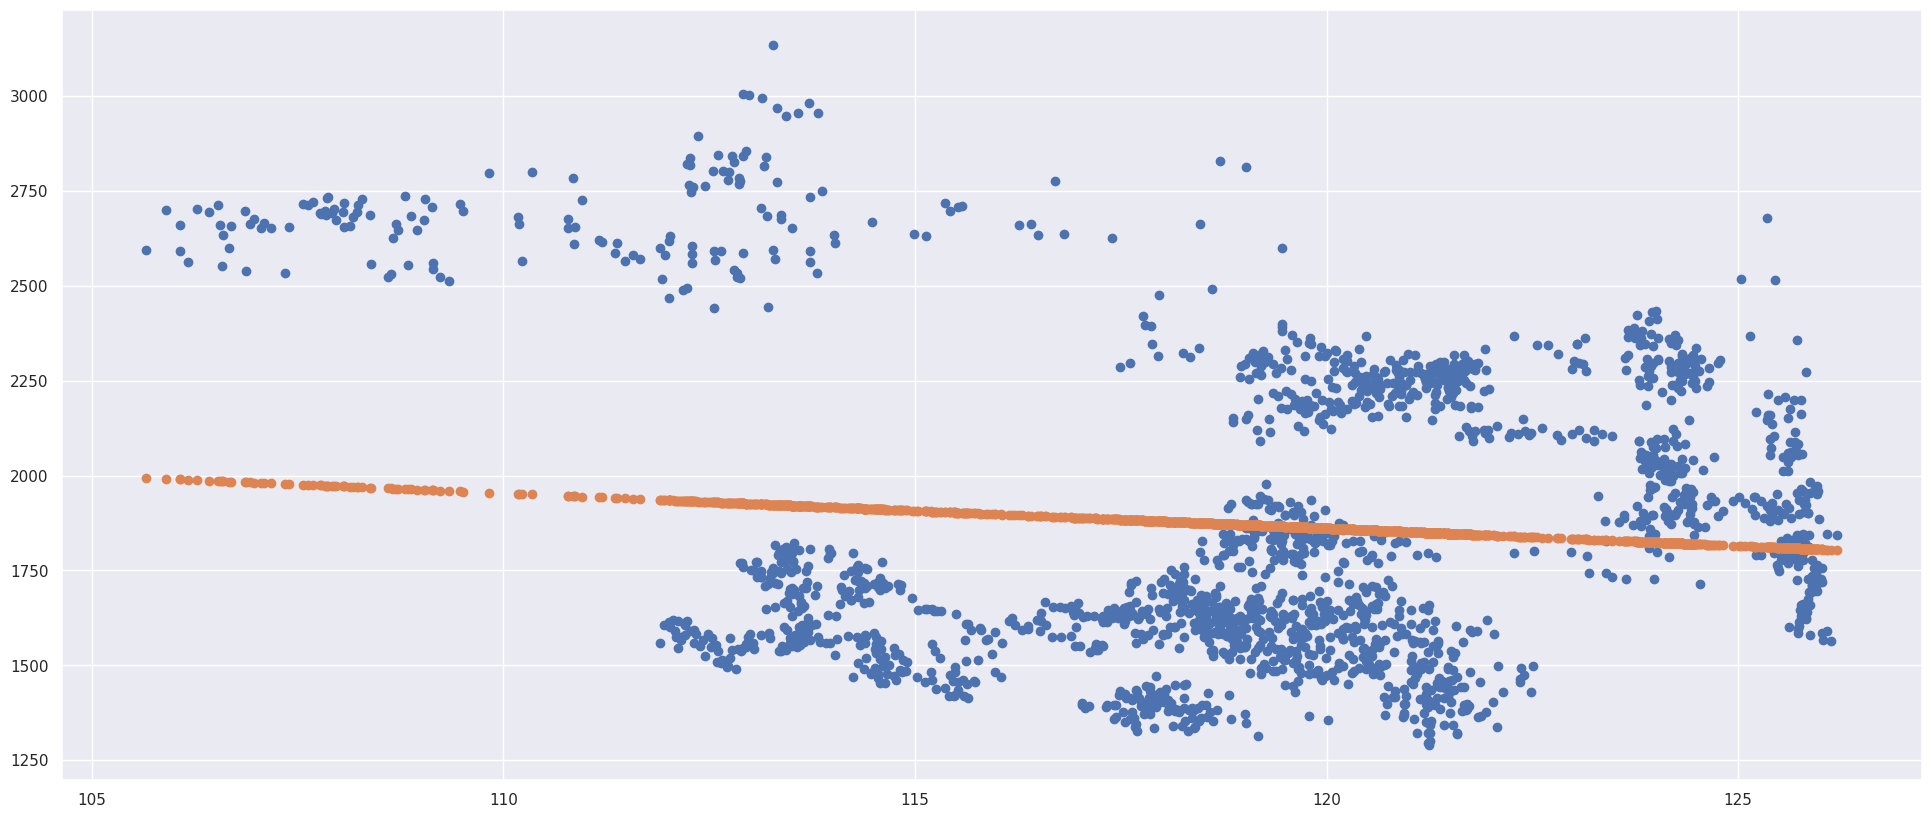

In [29]:
LinRegression(Bonds, Food)

Train set: (2002, 1) (2002, 1)
Test set: (501, 1) (501, 1)

Intercept of Regression:	: b =  [1500.69320854]
Coefficients of Regression:	: a =  [[12.32346163]]

Train Set - Explained Variance (R^2)	: 0.3665102330534623

Test Set Metrics
Mean Squared Error (MSE) 	: 87139.59785192837
Root Mean Squared Error (RMSE) 	: 295.1941697458274




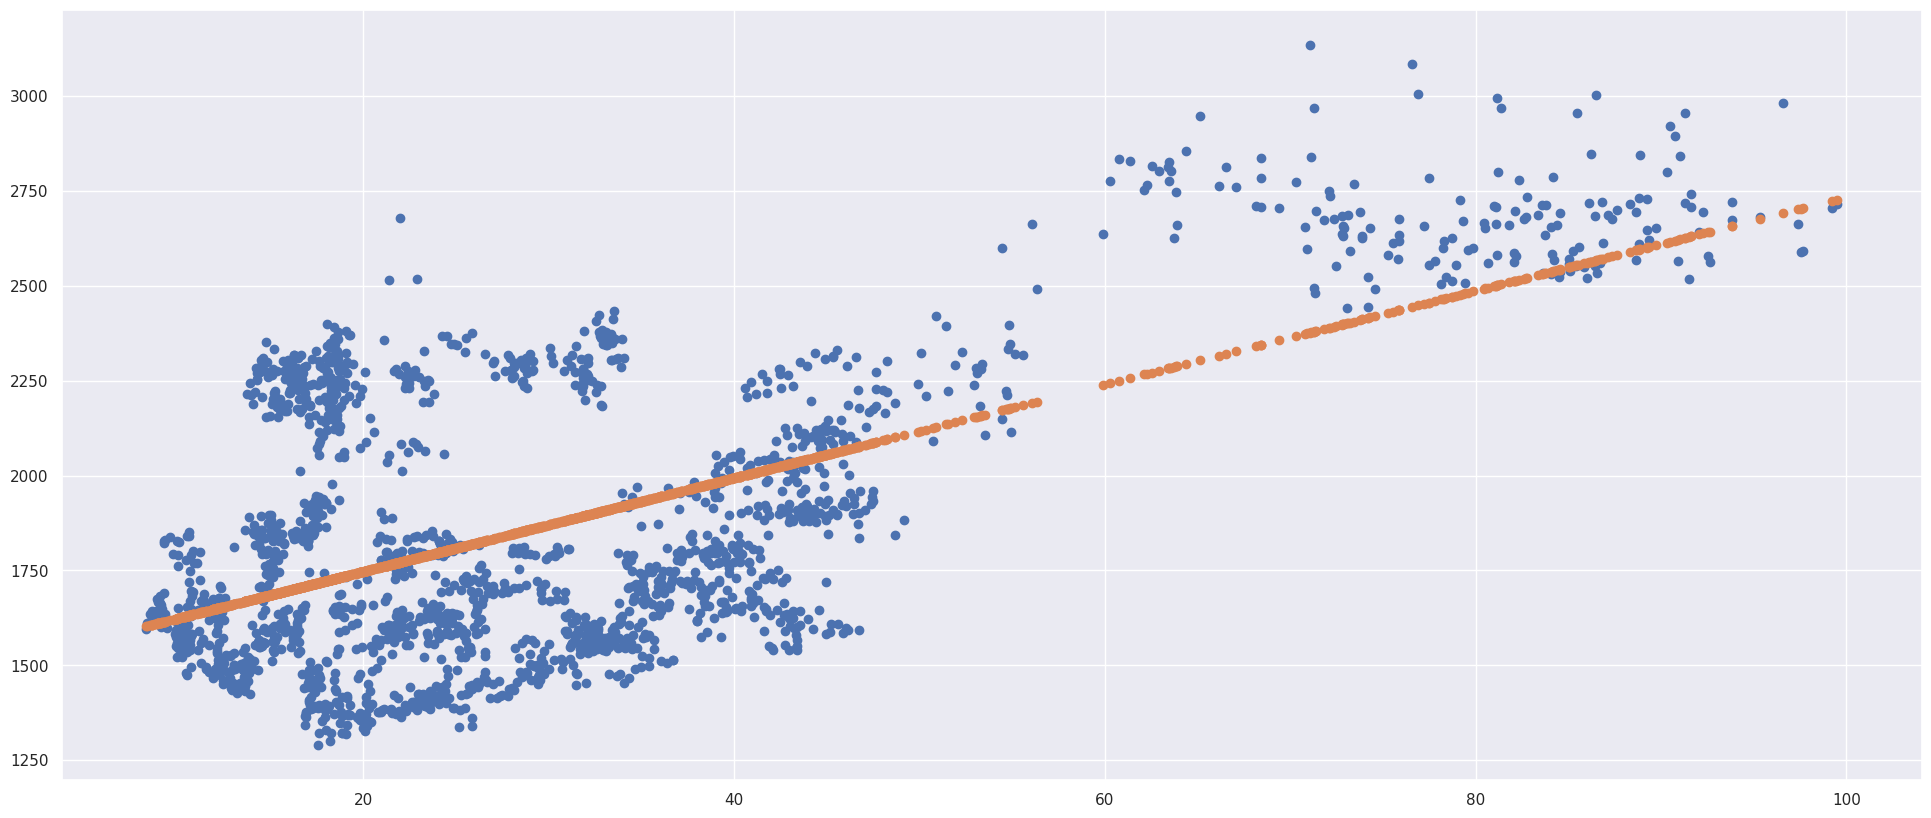

In [30]:
LinRegression(Fert, Food)

Train set: (2002, 1) (2002, 1)
Test set: (501, 1) (501, 1)

Intercept of Regression:	: b =  [1052.11351887]
Coefficients of Regression:	: a =  [[12.45383992]]

Train Set - Explained Variance (R^2)	: 0.5657408120915035

Test Set Metrics
Mean Squared Error (MSE) 	: 64054.8573937679
Root Mean Squared Error (RMSE) 	: 253.09061103440385




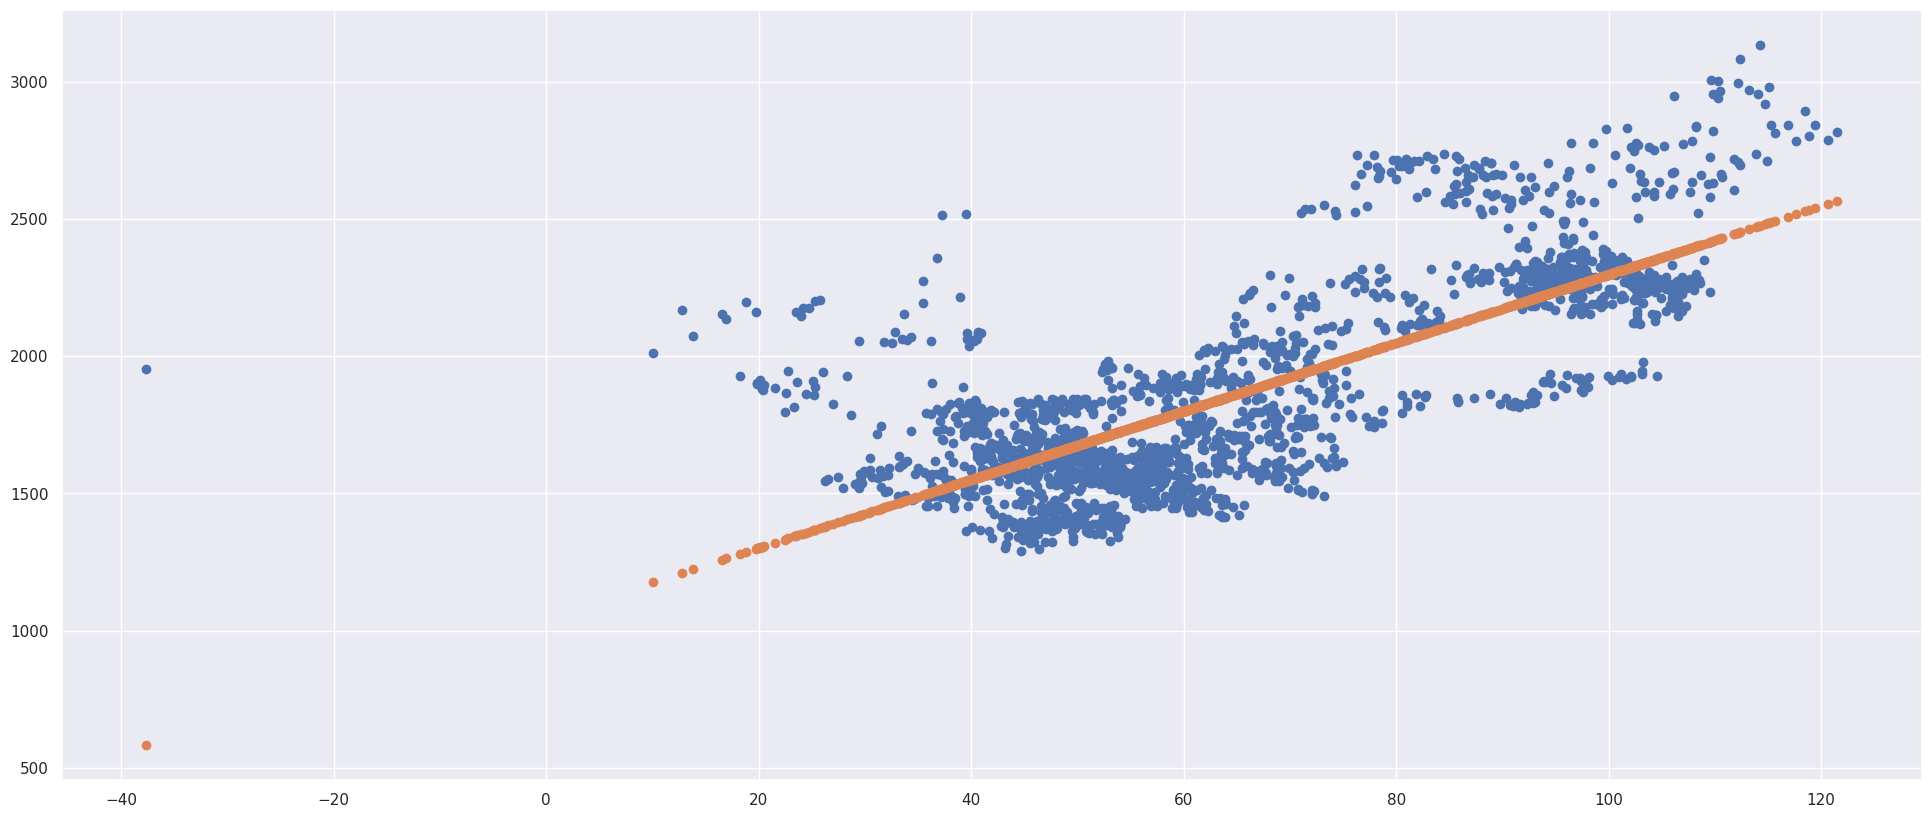

In [31]:
LinRegression(Crude, Food)

Train set: (2002, 1) (2002, 1)
Test set: (501, 1) (501, 1)

Intercept of Regression:	: b =  [1177.83505885]
Coefficients of Regression:	: a =  [[201.90828645]]

Train Set - Explained Variance (R^2)	: 0.5618228169907065

Test Set Metrics
Mean Squared Error (MSE) 	: 63703.279784707796
Root Mean Squared Error (RMSE) 	: 252.3950866889207




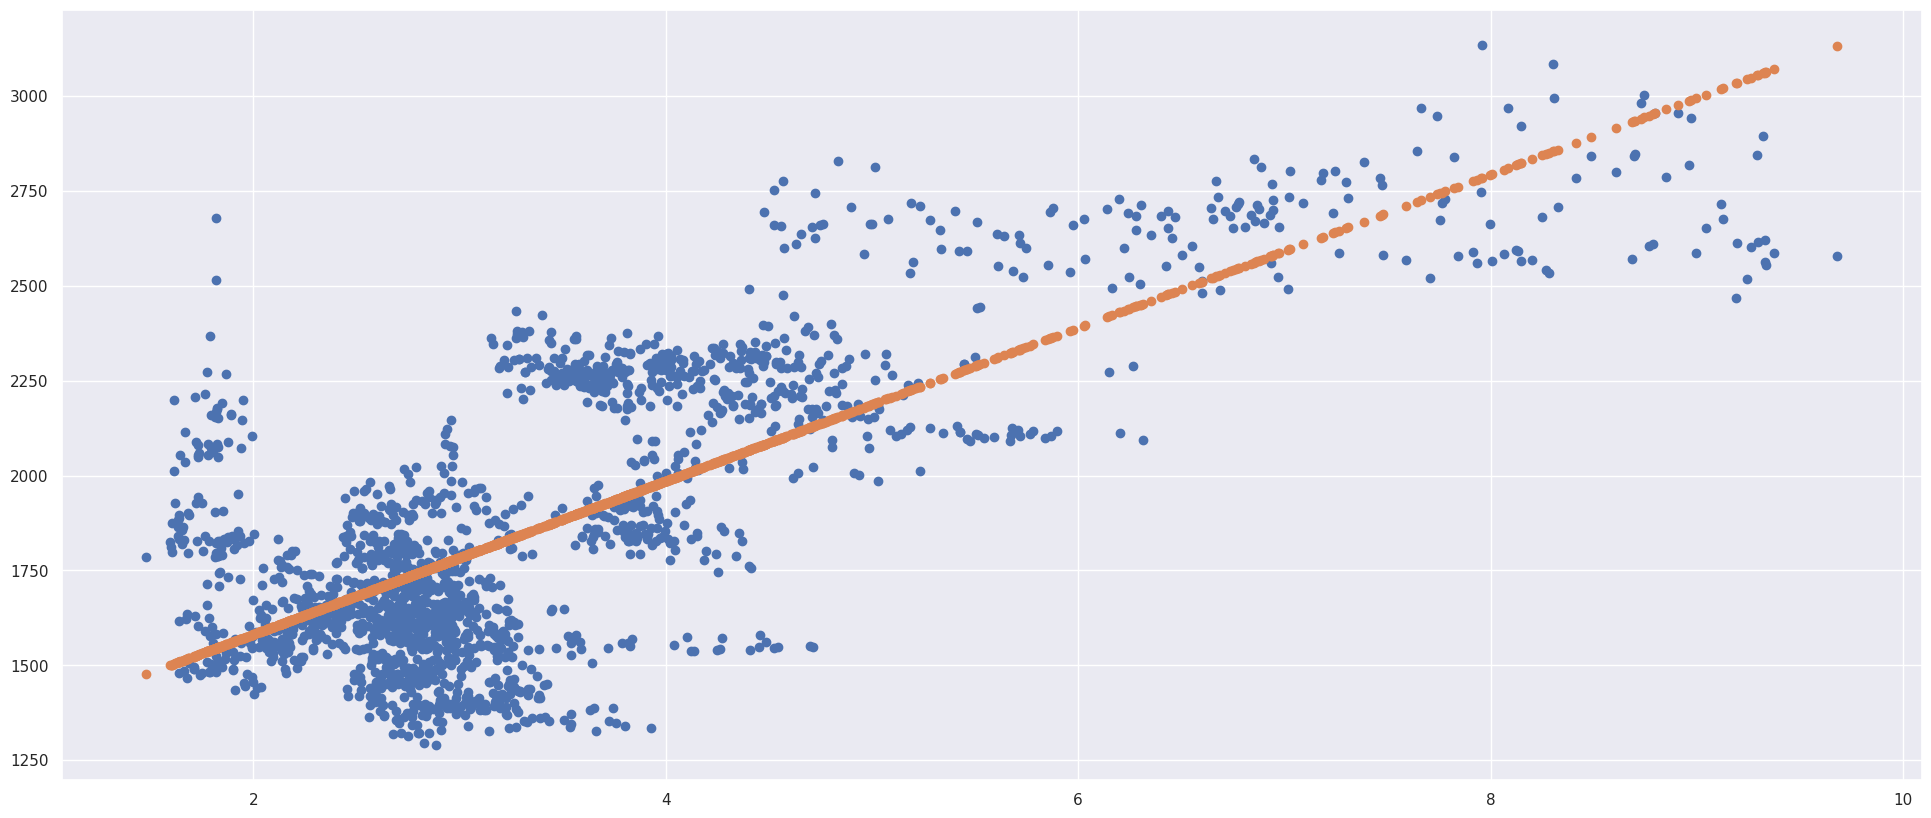

In [32]:
LinRegression(Nat, Food)

Train set: (2002, 1) (2002, 1)
Test set: (501, 1) (501, 1)

Intercept of Regression:	: b =  [1716.15629243]
Coefficients of Regression:	: a =  [[2.04655663]]

Train Set - Explained Variance (R^2)	: 0.3106154607730328

Test Set Metrics
Mean Squared Error (MSE) 	: 104503.7690621403
Root Mean Squared Error (RMSE) 	: 323.2704271382403




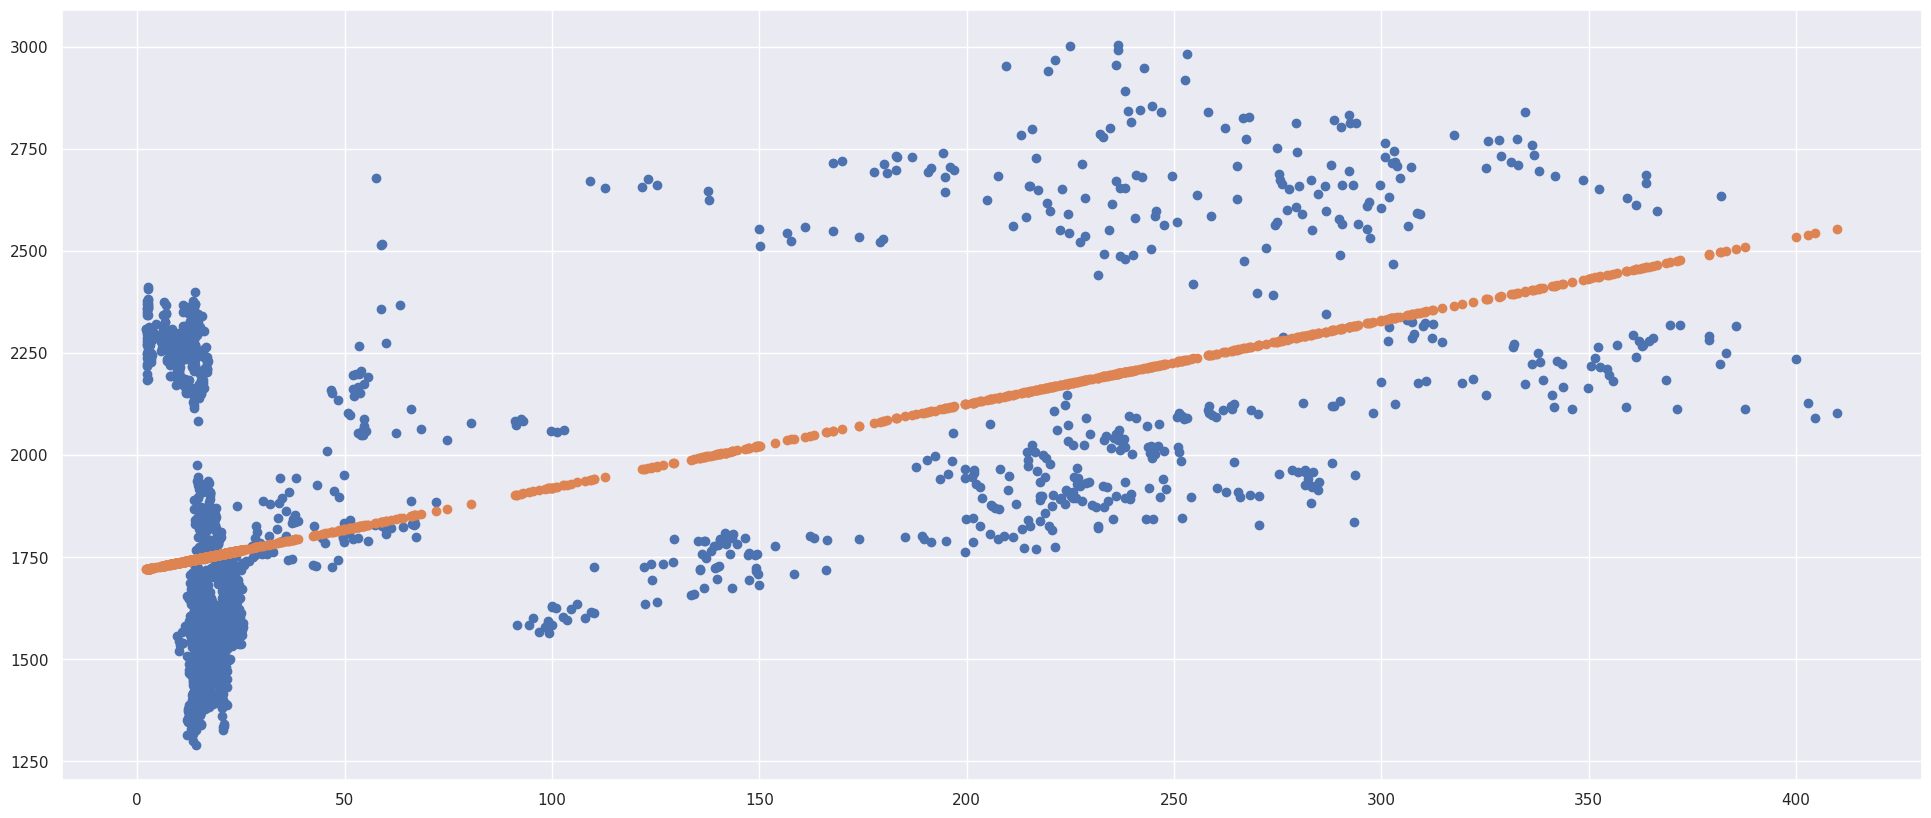

In [33]:
LinRegression(Tesla, Food)

Train set: (2002, 1) (2002, 1)
Test set: (501, 1) (501, 1)

Intercept of Regression:	: b =  [1480.50779533]
Coefficients of Regression:	: a =  [[0.001363]]

Train Set - Explained Variance (R^2)	: 0.11211922196742186

Test Set Metrics
Mean Squared Error (MSE) 	: 128738.48383694403
Root Mean Squared Error (RMSE) 	: 358.8014546193257




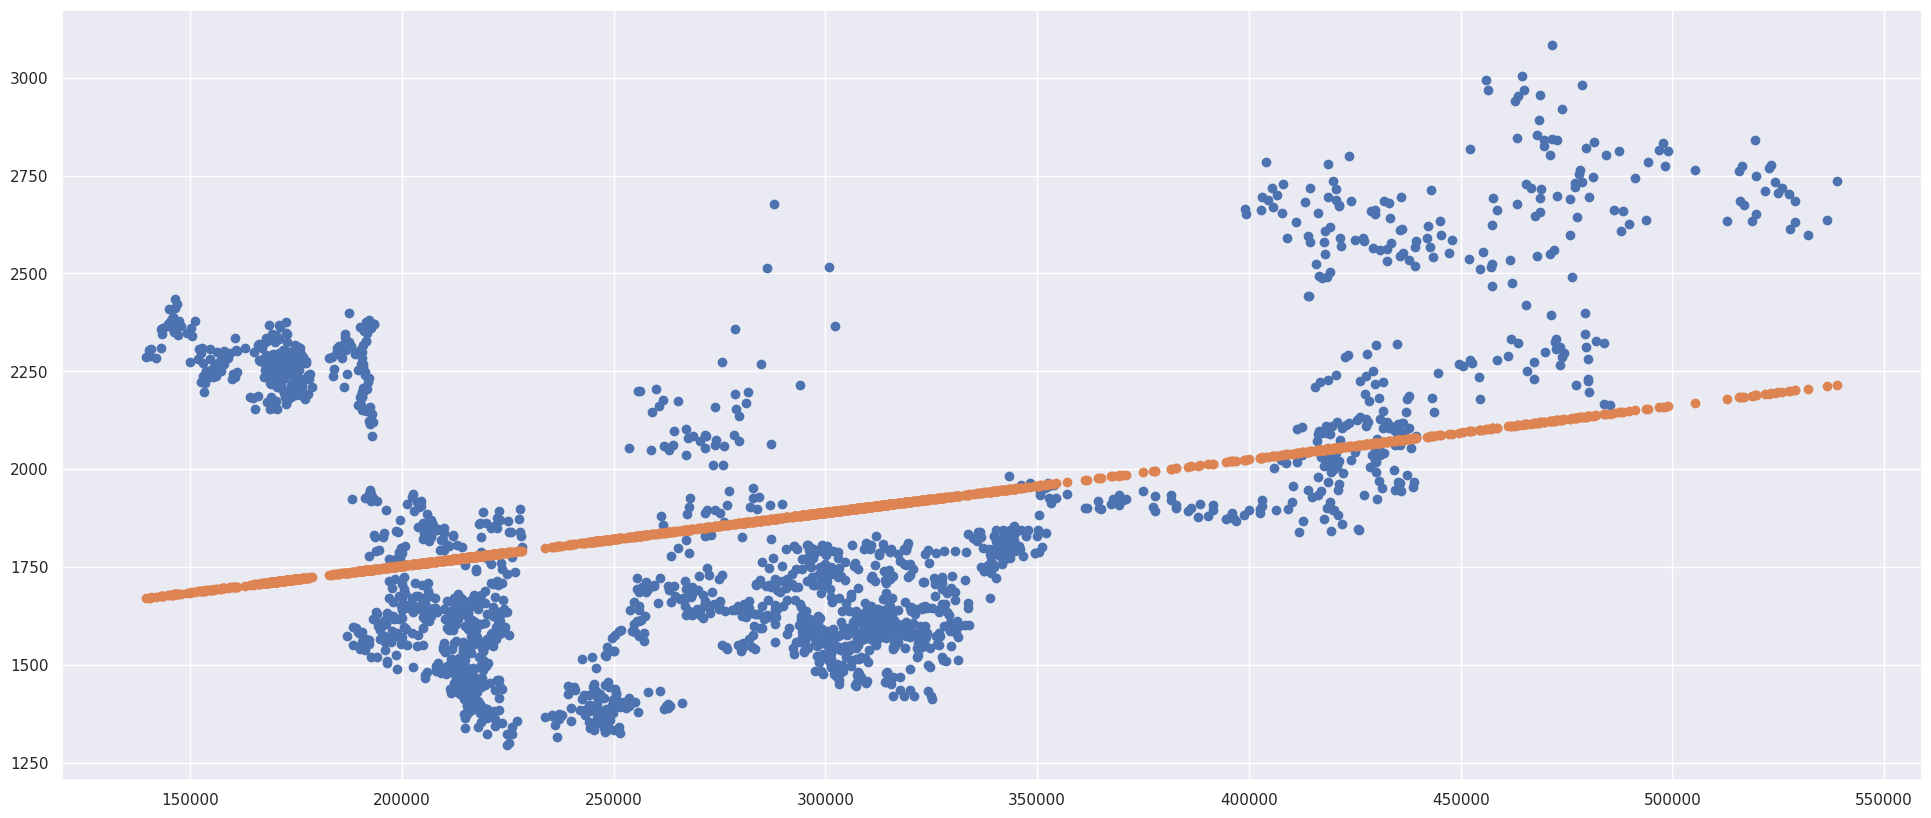

In [34]:
LinRegression(Berkshire, Food)

### Multivariate 

# Granger Causality Test

The Granger Causalitytest is used to test for "Granger Causality" or the degree to which two time series datasets are temporally related.

A simple linear regression would not produce a reliable correlation value as changes in one time series may not immediately affect the other. The P-value obtained from a Granger Causality test allows us to check the validiaty of the Null Hypothesis. The smaller the P-value, the more likely it is that the NULL hypothesis can be rejected.

( NULL Hypothesis: There is NO correlation between the datasets. )

Before we apply the Granger causality test, we would need to check for stationarity. 
Stationarity is the property of the time series data set to be  


In [35]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

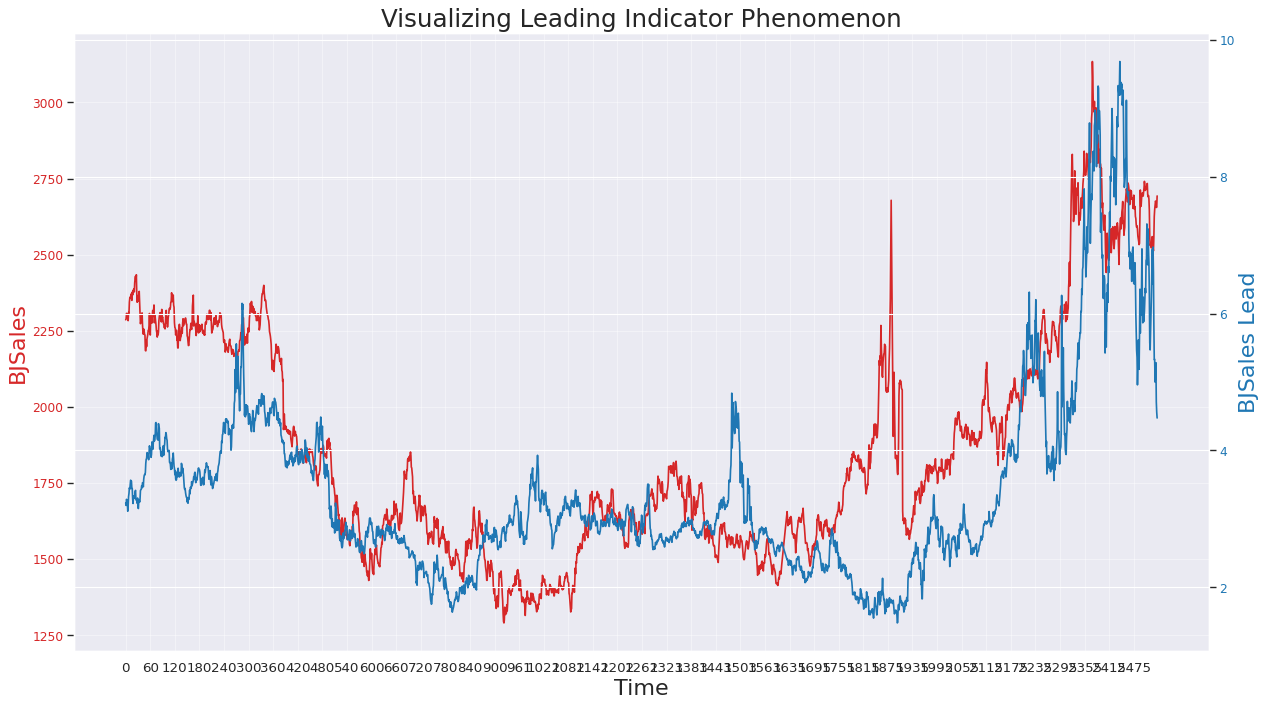

In [36]:
x = stockCSV.index
y1 = stockCSV['Foodsum']
y2 = stockCSV['NG=F']

# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x, y1, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(x, y2, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Time', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('BJSales', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("BJSales Lead", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Visualizing Leading Indicator Phenomenon", fontsize=22)
fig.tight_layout()
plt.show()

In [37]:
!pip install statsmodels==0.14.2


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [38]:
from statsmodels.tsa.stattools import grangercausalitytests

In [39]:
maxlag = 12
test   = 'ssr_chi2test'

In [40]:
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

In [41]:
combined_df = pd.concat([y1, y2], axis=1)

grangers_causation_matrix(combined_df, variables = combined_df.columns)

,Foodsum_x,NG=F_x
Foodsum_y,1.000,0.0003
NG=F_y,0.005,1.0000


In [42]:
def granger_causality(x,y1,y2):
        
        # Plot Line1 (Left Y Axis)
        fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
        ax1.plot(x, y1, color='tab:red')

        # Plot Line2 (Right Y Axis)
        ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
        ax2.plot(x, y2, color='tab:blue')

        # Decorations
        # ax1 (left Y axis)
        ax1.set_xlabel('Time', fontsize=20)
        ax1.tick_params(axis='x', rotation=0, labelsize=12)
        ax1.set_ylabel('BJSales', color='tab:red', fontsize=20)
        ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
        ax1.grid(alpha=.4)

        # ax2 (right Y axis)
        ax2.set_ylabel("BJSales Lead", color='tab:blue', fontsize=20)
        ax2.tick_params(axis='y', labelcolor='tab:blue')
        ax2.set_xticks(np.arange(0, len(x), 60))
        ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
        ax2.set_title("Visualizing Leading Indicator Phenomenon", fontsize=22)
        fig.tight_layout()
        plt.show()
        

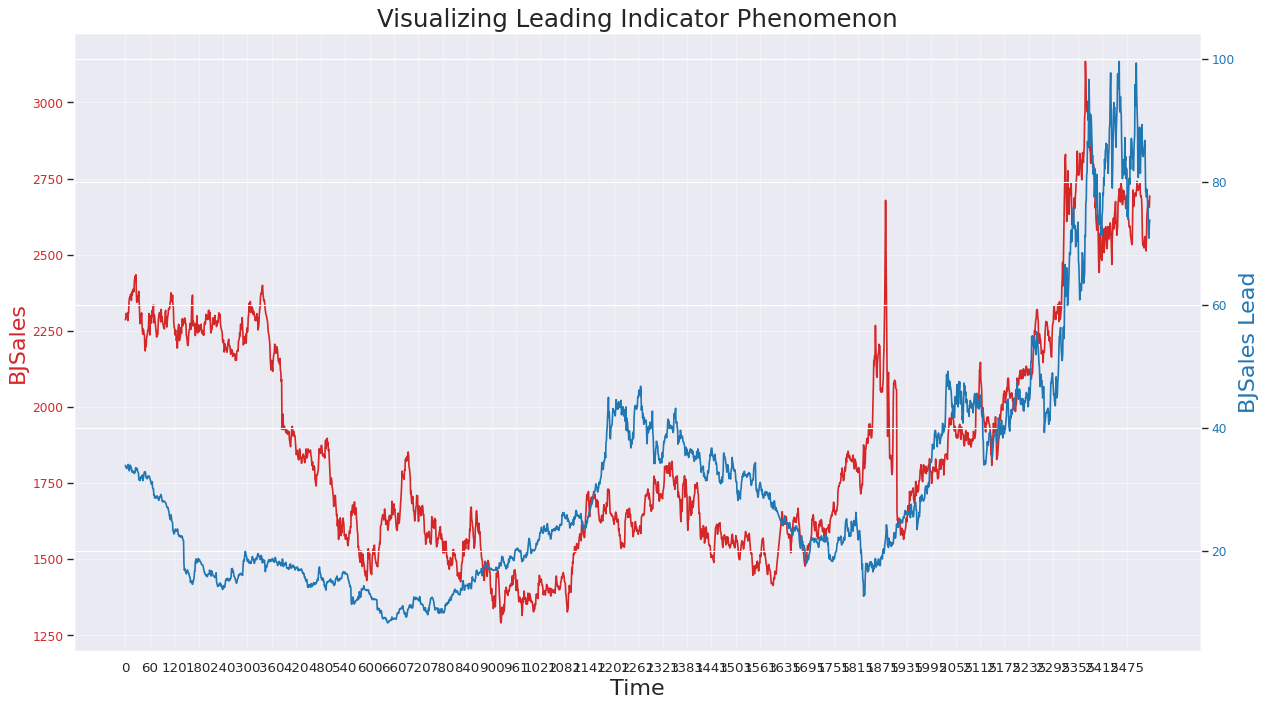

,Foodsum_x,SQM_x
Foodsum_y,1.0000,0.0008
SQM_y,0.0592,1.0000


In [43]:

granger_causality(stockCSV.index, stockCSV['Foodsum'], stockCSV['SQM'])
maxlag = 12
test   = 'ssr_chi2test'
y1= stockCSV['Foodsum'] 
y2= stockCSV['SQM']
combined_df = pd.concat([y1, y2], axis=1)
grangers_causation_matrix(combined_df, variables = combined_df.columns)

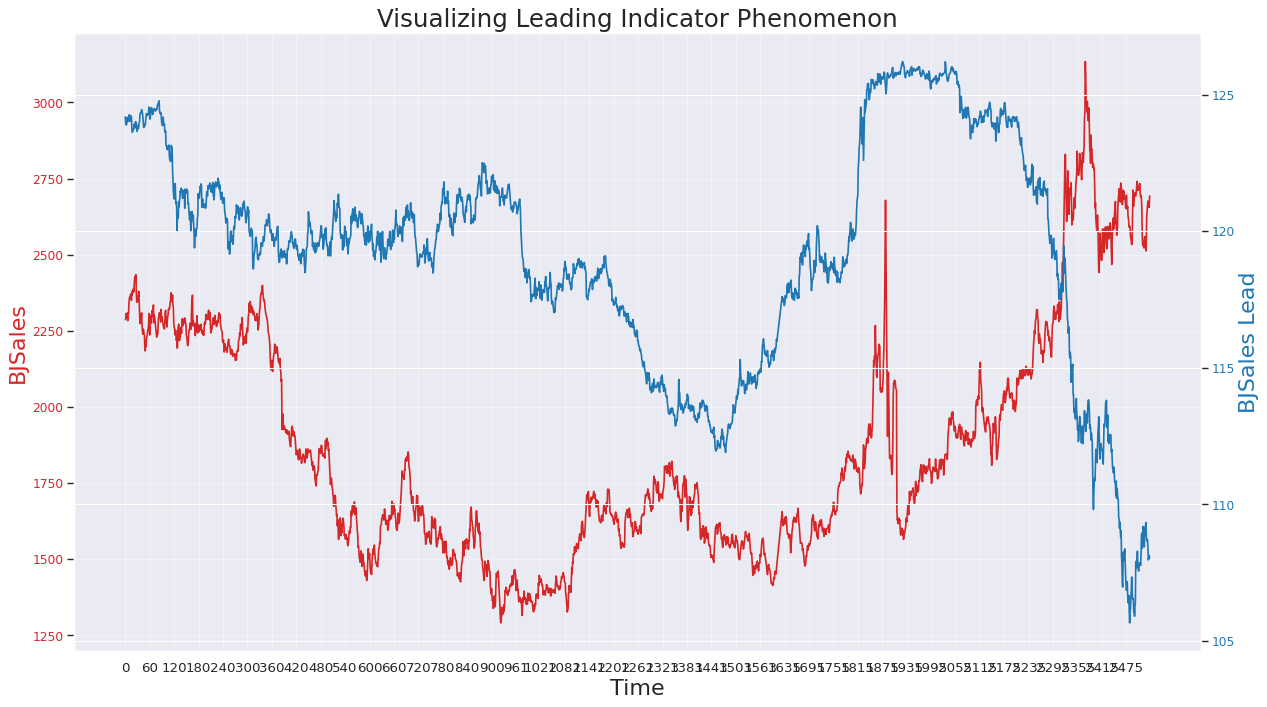

,Foodsum_x,ZF=F_x
Foodsum_y,1.0000,0.2642
ZF=F_y,0.0029,1.0000


In [44]:
granger_causality(stockCSV.index, stockCSV['Foodsum'], stockCSV['ZF=F'])
maxlag = 12
test   = 'ssr_chi2test'
y1= stockCSV['Foodsum'] 
y2= stockCSV['ZF=F']
combined_df = pd.concat([y1, y2], axis=1)
grangers_causation_matrix(combined_df, variables = combined_df.columns)

We can thus see that Bonds are not that good at being used as a predictor for "Foodsum" as the chance they may not be temporally related is quite high.

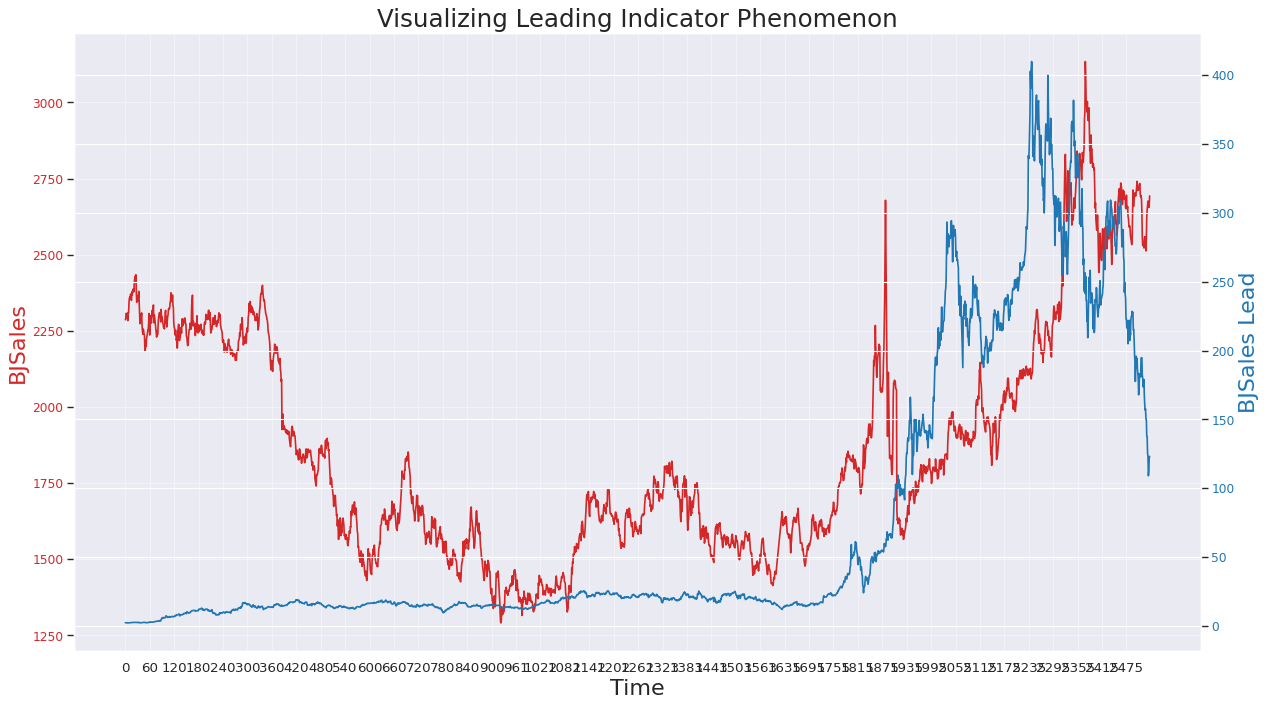

,Foodsum_x,TSLA_x
Foodsum_y,1.0000,0.0
TSLA_y,0.2294,1.0


In [45]:
granger_causality(stockCSV.index, stockCSV['Foodsum'], stockCSV['TSLA'])
maxlag = 12
test   = 'ssr_chi2test'
y1= stockCSV['Foodsum'] 
y2= stockCSV['TSLA']
combined_df = pd.concat([y1, y2], axis=1)
grangers_causation_matrix(combined_df, variables = combined_df.columns)

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

!pip install xgboost
import xgboost as xgb

Date.head()


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


,Date
0,2013-01-02
1,2013-01-03
2,2013-01-04
3,2013-01-07
4,2013-01-08


In [59]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

stockCSV["Dateint"] = pd.to_datetime(stockCSV['Date']) 
stockCSV.head()
# Create a DataFrame
data = pd.DataFrame({stockCSV["Dateint"]: time, stockCSV['CL=F']: predictor, stockCSV['FoodSum']: response})

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(Crude,Food, test_size=0.2, shuffle=False)  # Assuming chronological order

# Prepare data for XGBoost
X_train = train[stockCSV[numpy_array]]
y_train = train [stockCSV[numpy_array2]]
X_test = test[stockCSV[numpy_array]]
y_test = test [stockCSV[numpy_array2]]

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)  # Define the model
model.fit(X_train, y_train)  # Train the model

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test['Date'], y_test, label='Actual')
plt.plot(test['Date'], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Foodsum')
plt.title('XGBoost Model Prediction')
plt.legend()
plt.show()

NameError: name 'time' is not defined

Mean Squared Error: 228758.42979405064


TypeError: unhashable type: 'numpy.ndarray'

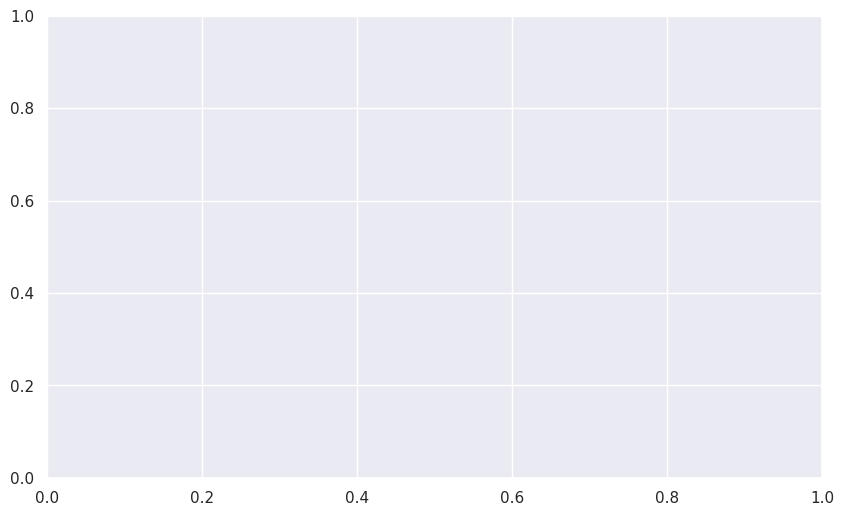

In [54]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split the data into training and testing sets


X_train, X_test, y_train, y_test = train_test_split(stockCSV['CL=F'],stockCSV['Foodsum'], test_size=0.2, shuffle=False)

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)  # Define the model
model.fit(X_train, y_train)  # Train the model

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(Date, y_test, label='Actual')
plt.plot(Date, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Foodsum')
plt.title('XGBoost Model Prediction')
plt.legend()
plt.show()

In [ ]:
##x_train = train['CL=F']
#Y_train = train['Foodsum']

#x_test = test['CL=F']
#X_test = test['Foodsum']
x_train, x_test, y_train, y_test = train_test_split(Crude, Food, test_size = 0.20)


In [ ]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds=50, learning_rate =0.01)
reg.fit(x_train, y_train, eval_set=[(x_train, y_train),(x_test, y_test)],verbose = 100)

[0]	validation_0-rmse:372.98198	validation_1-rmse:378.71376
[100]	validation_0-rmse:224.88569	validation_1-rmse:229.99453
[200]	validation_0-rmse:194.43924	validation_1-rmse:201.91999
[300]	validation_0-rmse:188.65207	validation_1-rmse:198.64965
[352]	validation_0-rmse:187.58924	validation_1-rmse:198.83143


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def arimax_correlation(series1, series2, exog_series=None, order=(1,0,0)):
    """
    Calculate correlation between two time series using ARIMAX model.

    Parameters:
    series1 (array-like): First time series data.
    series2 (array-like): Second time series data.
    exog_series (array-like, optional): Exogenous variable time series.
    order (tuple, optional): The (p,d,q) order of the ARIMA model.

    Returns:
    float: Correlation between the two time series.
    """
    # Convert series to pandas Series
    series1 = pd.Series(series1)
    series2 = pd.Series(series2)

    # Check if lengths match
    if len(series1) != len(series2):
        raise ValueError("Length of both time series must be the same.")

    # If exogenous variable provided, check its length
    if exog_series is not None:
        exog_series = pd.Series(exog_series)
        if len(exog_series) != len(series1):
            raise ValueError("Length of exogenous variable must be the same as the time series.")

    # Construct the model
    model = sm.tsa.ARIMA(endog=series1, exog=exog_series, order=order)
    fitted_model = model.fit()

    # Predict the second time series using the fitted ARIMAX model
    pred_series2 = fitted_model.predict()

    # Calculate correlation between predicted series and actual series2
    correlation = np.corrcoef(pred_series2, series2)[0, 1]

    return correlation

# Example usage:
# Generate synthetic time series data for demonstration
np.random.seed(0)
series1 = stockCSV['Foodsum']
series2 = stockCSV['CL=F']

# Calculate correlation between series1 and series2 using ARIMAX
correlation = arimax_correlation(series1, series2, order=(1, 0, 0))
print("Correlation between series1 and series2:", correlation)

Correlation between series1 and series2: 0.7499618600783158
/root/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def arimax_correlation(series1, series2, exog_series=None, order=(1,0,0)):
    """
    Calculate correlation between two time series using ARIMAX model.

    Parameters:
    series1 (array-like): First time series data.
    series2 (array-like): Second time series data.
    exog_series (array-like, optional): Exogenous variable time series.
    order (tuple, optional): The (p,d,q) order of the ARIMA model.

    Returns:
    float: Correlation between the two time series.
    """
    # Convert series to pandas Series
    series1 = pd.Series(series1)
    series2 = pd.Series(series2)

    # Check if lengths match
    if len(series1) != len(series2):
        raise ValueError("Length of both time series must be the same.")

    # If exogenous variable provided, check its length
    if exog_series is not None:
        exog_series = pd.Series(exog_series)
        if len(exog_series) != len(series1):
            raise ValueError("Length of exogenous variable must be the same as the time series.")

    # Construct the model
    model = sm.tsa.ARIMA(endog=series1, exog=exog_series, order=order)
    fitted_model = model.fit()

    # Predict the second time series using the fitted ARIMAX model
    pred_series2 = fitted_model.predict()

    # Calculate correlation between predicted series and actual series2
    correlation = np.corrcoef(pred_series2, series2)[0, 1]

    return correlation

# Example usage:
# Generate synthetic time series data for demonstration
np.random.seed(0)
series1 = stockCSV['Foodsum']
series2 = stockCSV['GC=F']

# Calculate correlation between series1 and series2 using ARIMAX
correlation = arimax_correlation(series1, series2, order=(1, 0, 0))
print("Correlation between series1 and series2:", correlation)

Correlation between series1 and series2: 0.5506287480940089
/root/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

def arimax_correlation(series1, series2, exog_series=None, order=(1,0,0)):
    """
    Calculate correlation between two time series using ARIMAX model.

    Parameters:
    series1 (array-like): First time series data.
    series2 (array-like): Second time series data.
    exog_series (array-like, optional): Exogenous variable time series.
    order (tuple, optional): The (p,d,q) order of the ARIMA model.

    Returns:
    float: Correlation between the two time series.
    """
    # Convert series to pandas Series
    series1 = pd.Series(series1)
    series2 = pd.Series(series2)

    # Check if lengths match
    if len(series1) != len(series2):
        raise ValueError("Length of both time series must be the same.")

    # If exogenous variable provided, check its length
    if exog_series is not None:
        exog_series = pd.Series(exog_series)
        if len(exog_series) != len(series1):
            raise ValueError("Length of exogenous variable must be the same as the time series.")

    # Construct the model
    model = sm.tsa.ARIMA(endog=series1, exog=exog_series, order=order)
    fitted_model = model.fit()

    # Predict the second time series using the fitted ARIMAX model
    pred_series2 = fitted_model.predict()

    # Calculate correlation between predicted series and actual series2
    correlation = np.corrcoef(pred_series2, series2)[0, 1]

    return correlation

# Example usage:
# Generate synthetic time series data for demonstration
np.random.seed(0)
series1 = stockCSV['Foodsum']
series2 = stockCSV['ZF=F']

# Calculate correlation between series1 and series2 using ARIMAX
correlation = arimax_correlation(series1, series2, order=(1, 0, 0))
print("Correlation between series1 and series2:", correlation)

Correlation between series1 and series2: -0.1224476282742206
/root/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/root/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [55]:
stockCSV["Dateint"] = pd.to_datetime(stockCSV['Date'])
stockCSV.head()

,Date,BRK-A,CL=F,GC=F,KE=F,NG=F,SQM,TSLA,ZF=F,ZR=F,Foodsum,Dateint
0,2013-01-02,139610.0,93.12,1687.9,811.00,3.233,33.891,2.357,124.188,1475.5,2286.50,2013-01-02
1,2013-01-03,140549.0,92.92,1673.7,811.25,3.198,33.654,2.318,123.945,1478.0,2289.25,2013-01-03
2,2013-01-04,140803.0,93.09,1648.1,804.50,3.287,33.625,2.293,123.891,1503.0,2307.50,2013-01-04
3,2013-01-07,140190.0,93.19,1645.5,807.50,3.266,33.381,2.289,123.906,1497.5,2305.00,2013-01-07
4,2013-01-08,141000.0,93.15,1661.5,808.75,3.218,33.410,2.245,124.031,1496.0,2304.75,2013-01-08


Mean Squared Error: 228758.42979405064


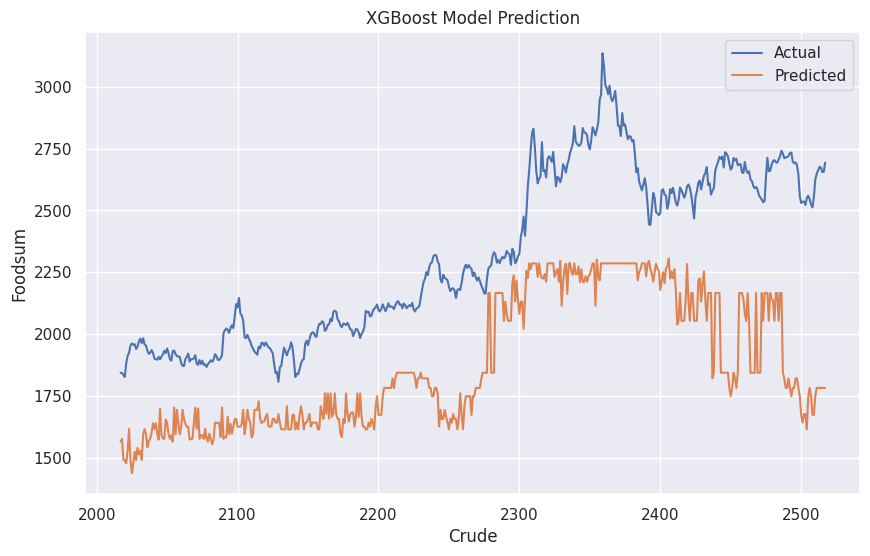

In [62]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming stockCSV is your DataFrame
stockCSV["Dateint"] = pd.to_datetime(stockCSV['Date']) 

# Create a DataFrame
data = pd.DataFrame({
    'Time': stockCSV["Dateint"],  # Assuming 'Dateint' is the column with time values
    'Predictor': stockCSV['CL=F'],  # Assuming 'CL=F' is the predictor column
    'Response': stockCSV['Foodsum']  # Assuming 'FoodSum' is the response column
})

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data[['Predictor']], data['Response'], test_size=0.2, shuffle=False)  # Assuming chronological order

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)  # Define the model
model.fit(x_train, y_train)  # Train the model

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Crude')  # Change 'Index' to a suitable label for your x-axis
plt.ylabel('Foodsum')
plt.title('XGBoost Model Prediction')
plt.legend()
plt.show()

Mean Squared Error: 590313.9464610827


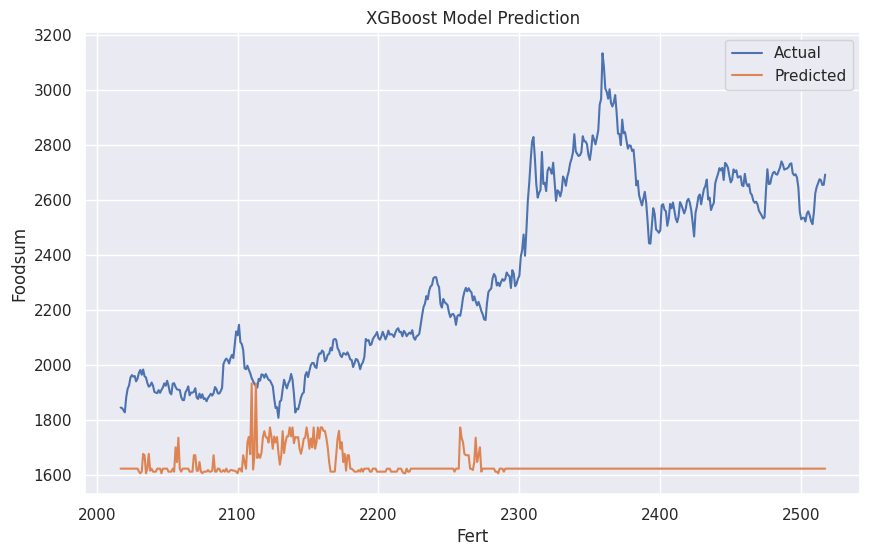

In [63]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming stockCSV is your DataFrame
stockCSV["Dateint"] = pd.to_datetime(stockCSV['Date']) 

# Create a DataFrame
data = pd.DataFrame({
    'Time': stockCSV["Dateint"],  # Assuming 'Dateint' is the column with time values
    'Predictor': stockCSV['SQM'],  # Assuming 'CL=F' is the predictor column
    'Response': stockCSV['Foodsum']  # Assuming 'FoodSum' is the response column
})

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data[['Predictor']], data['Response'], test_size=0.2, shuffle=False)  # Assuming chronological order

# Initialize and train the XGBoost model
model = XGBRegressor(objective='reg:squarederror', random_state=42)  # Define the model
model.fit(x_train, y_train)  # Train the model

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Fert')  # Change 'Index' to a suitable label for your x-axis
plt.ylabel('Foodsum')
plt.title('XGBoost Model Prediction')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=543d7f32-5579-43a1-bcd3-dc2bba191e14' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>